In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib as mpl

from specim_test.specim.specfuncs import spec2d, echelle1d, spec1d, echelle2d
from veldis.veldis import Veldis
from matplotlib import gridspec

plt.style.use('../../plot_style.txt')

### First load the spectra with the wavelength range used to fit for velocity dispersion.

In [2]:
B0445_spec = spec1d.Spec1d('../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector_Jan2022.fits', 
              informat='fits')


Reading spectrum from ../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector_Jan2022.fits
Expected file format: fits
 Spectrum Start:  5650.60
 Spectrum End:     8926.60
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



In [3]:
B0631_spec = spec1d.Spec1d('../spectra_extraction/B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector_Jan2022.fits', 
              informat='fits')


Reading spectrum from ../spectra_extraction/B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector_Jan2022.fits
Expected file format: fits
 Spectrum Start:  5649.56
 Spectrum End:     8925.56
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



In [4]:
J0147_spec = spec1d.Spec1d('../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_esi_coadd2d_deflector_Jan2022.fits', 
              informat='fits', logwav=True)#[7000, -3500]


Reading spectrum from ../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_esi_coadd2d_deflector_Jan2022.fits
Expected file format: fits
 Spectrum Start:  4071.46
 Spectrum End:    10267.76
 Dispersion (1st pixel):   0.15
 Dispersion (average):      0.25



In [5]:
J0818_spec = spec1d.Spec1d('../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_esi_coadd2d_deflector_Jan2022.fits', 
              informat='fits', logwav=True) #13600, [4130, 12200]


Reading spectrum from ../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_esi_coadd2d_deflector_Jan2022.fits
Expected file format: fits
 Spectrum Start:  4904.00
 Spectrum End:    10268.93
 Dispersion (1st pixel):   0.19
 Dispersion (average):      0.28



In [6]:
J0924_spec = spec1d.Spec1d('../spectra_extraction/J0924_ESI_spectra/spec1d_J0924_esi_coadd2d_deflector_Jan2022.fits',
              informat='fits', logwav=True)


Reading spectrum from ../spectra_extraction/J0924_ESI_spectra/spec1d_J0924_esi_coadd2d_deflector_Jan2022.fits
Expected file format: fits
 Spectrum Start:  4546.04
 Spectrum End:    10267.76
 Dispersion (1st pixel):   0.17
 Dispersion (average):      0.27



In [7]:
J1433_spec = spec1d.Spec1d('../spectra_extraction/J1433_ESI_spectra/spec1d_J1433_esi_coadd2d_deflector_Jan2022.fits', 
              informat='fits', logwav=True)


Reading spectrum from ../spectra_extraction/J1433_ESI_spectra/spec1d_J1433_esi_coadd2d_deflector_Jan2022.fits
Expected file format: fits
 Spectrum Start:  4546.90
 Spectrum End:    10268.93
 Dispersion (1st pixel):   0.17
 Dispersion (average):      0.27



In [8]:
J1817_spec = spec1d.Spec1d('../spectra_extraction/J1817_ESI_spectra/spec1d_J1817_esi_coadd2d_deflector_Jan2022.fits', 
              informat='fits', logwav=True)#13000


Reading spectrum from ../spectra_extraction/J1817_ESI_spectra/spec1d_J1817_esi_coadd2d_deflector_Jan2022.fits
Expected file format: fits
 Spectrum Start:  4546.90
 Spectrum End:    10268.93
 Dispersion (1st pixel):   0.17
 Dispersion (average):      0.27



In [9]:
lens_sys = [B0445_spec, B0631_spec, J0147_spec, J0818_spec, J0924_spec, J1433_spec, J1817_spec]
lens_name = np.array(['B0445+123', 'B0631+519', 'J0147+4630', 'J0818-2613', 'J0924+0219',
                      'J1433+6007', 'J1817+2729'])

In [79]:
lens_z = np.array([0.558, 0.620, 0.678, 0.866, 0.393, 0.407, 0.408])
trim_sp = np.array([[200, 2900], [635, 3700], [12391, -4050], [9821, 16471], [4289, -5584],
                   [3800, 15970], [4300, 11800]])
## Trim array is getting changed for J0147 and J1817,Original was [12491, -4800]

In [37]:
for sp, z, lens, trim in zip(lens_sys, lens_z, lens_name, trim_sp):
    wav = sp['wav'][trim[0]:trim[1]]
    rest_wav = wav/ (1.0 + z)
    print('lens : %s z: %.3f wav_range : %d - %d rest_wav : %d - %d' %(lens, z, int(wav[0]), int(wav[-1]),
                                                               int(rest_wav[0]), int(rest_wav[-1])))

lens : B0445+123 z: 0.558 wav_range : 5810 - 7969 rest_wav : 3729 - 5115
lens : B0631+519 z: 0.620 wav_range : 6157 - 8608 rest_wav : 3800 - 5314
lens : J0147+4630 z: 0.678 wav_range : 6519 - 8803 rest_wav : 3885 - 5246
lens : J0818-2613 z: 0.866 wav_range : 7121 - 9168 rest_wav : 3816 - 4913
lens : J0924+0219 z: 0.393 wav_range : 5350 - 8304 rest_wav : 3841 - 5961
lens : J1433+6007 z: 0.407 wav_range : 5253 - 8340 rest_wav : 3733 - 5928
lens : J1817+2729 z: 0.408 wav_range : 5353 - 7118 rest_wav : 3802 - 5055


In [67]:
smoothing = [3, 3, 11, 13, 11, 11, 13]
exclude_line = [None, None, ['H-delta','Fe4531'], ['H-delta', 'atm B'], None, None, None]
ylim_list = [[-0.5, 1.4], [-0.7, 2.1], [-0.1, 1.8], [-0.7, 2.6], [-0.3, 1.8], [-0.5, 1.8], [-0.6, 2.1]]
xtick_start = [6000, 6200, 6600, 7150, 5400, 5400, 5400]
trim_offset = [[110, 400], [0, 0], [0, 0], [0, 0], [0, 0], [500, 0], [0, 2000]]


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-theta       3797.00       5915.73
H-eta         3835.00       5974.93
CN bandhd     3883.00       6049.71
CaII K        3933.67       6128.66
CaII H        3968.47       6182.88
H-delta       4101.00       6389.36
G-band        4305.00       6707.19
H-gamma       4340.00       6761.72
Fe4383        4383.00       6828.71
Ca4455        4455.00       6940.89
Fe4531        4531.00       7059.30
H-beta        4861.00       7573.44
Mg I (b)      5176.00       8064.21


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       6212.70
CN bandhd     3883.00       6290.46
CaII K        3933.67       6372.55
CaII H        3968.47       6428.92
H-delta       4101.00       6643.62
G-band        4305.00       6974.10
H-gamma       4340.00       7030.80
Fe4383        4383.00       7100.46
Ca4455        4455.00       7217.10
Fe4531        4531.00       7340.22
H-beta        4861.00  

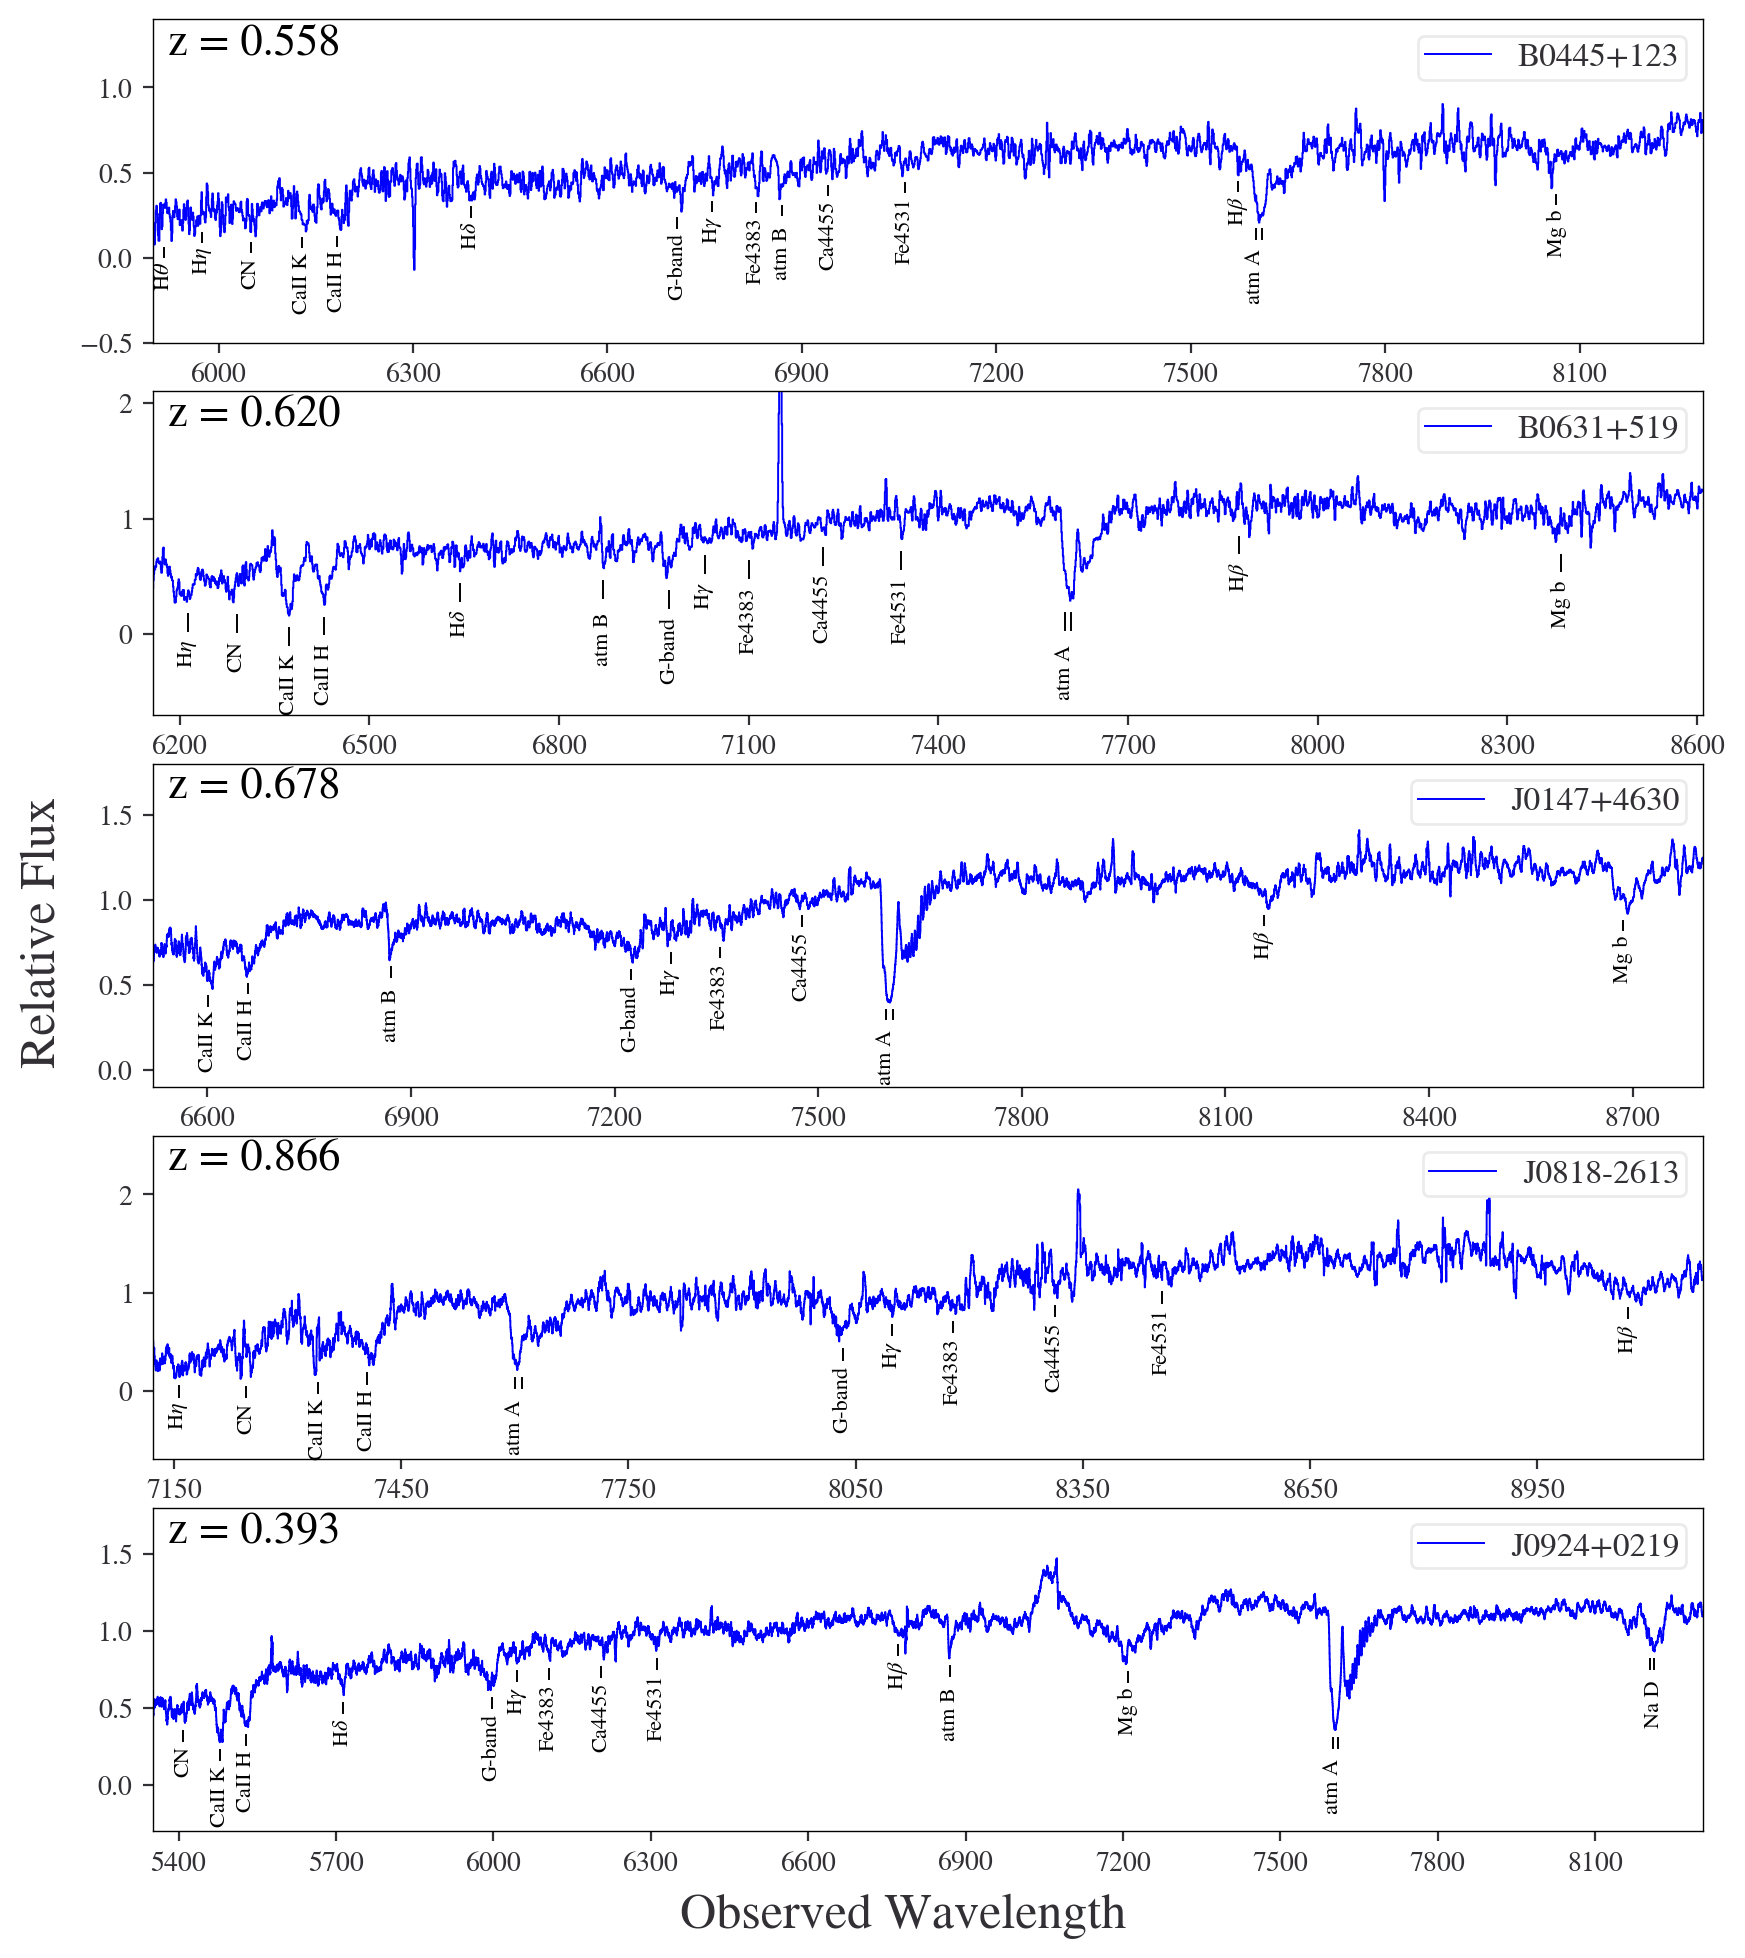

In [80]:
fg = plt.figure(figsize=(10, 12))
rows = 5
columns = 1
gs = gridspec.GridSpec(rows, columns, figure=fg)

for i in range(rows):
    ax1 = fg.add_subplot(gs[i, 0])
    if i>1:
        norm=np.median(lens_sys[i]['flux'][trim_sp[i][0]+trim_offset[i][0]:trim_sp[i][1]+trim_offset[i][1]])
        spec =spec1d.Spec1d(wav=lens_sys[i]['wav'], flux=lens_sys[i]['flux']/norm, verbose=False, 
                    trimsec=[trim_sp[i][0]+trim_offset[i][0], trim_sp[i][1]+trim_offset[i][1]])
    else:
        spec =spec1d.Spec1d(wav=lens_sys[i]['wav'], flux=lens_sys[i]['flux'], verbose=False,
                            trimsec=[trim_sp[i][0]+trim_offset[i][0], trim_sp[i][1]+trim_offset[i][1]])
        
    spec.smooth(smoothing[i], showzero=False, label=lens_name[i], title=None, xlabel=None, fontsize=8,
               fig=fg, ax=ax1, ylabel=None)
    spec.mark_lines('abs', z=lens_z[i], usesmooth=True, excludeline=exclude_line[i], labfs=8)
    plt.legend(fontsize=12)
    plt.ylim(ylim_list[i])
    plt.xticks(np.arange(xtick_start[i], spec['wav'][-1], 300))
    ax1.tick_params(axis='both', labelsize=10)
    plt.subplots_adjust(hspace=0.15)
fg.text(0.5, 0.09, 'Observed Wavelength', ha='center', va='center', fontsize=18)
fg.text(0.07, 0.5, 'Relative Flux', ha='center', va='center', rotation='vertical', fontsize=18)
plt.savefig('paper_plots/1d_spec_1.pdf', format='pdf', dpi=400, bbox_inches='tight')


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       5395.85
CN bandhd     3883.00       5463.38
CaII K        3933.67       5534.67
CaII H        3968.47       5583.64
H-delta       4101.00       5770.11
G-band        4305.00       6057.14
H-gamma       4340.00       6106.38
Fe4383        4383.00       6166.88
Ca4455        4455.00       6268.19
Fe4531        4531.00       6375.12
H-beta        4861.00       6839.43
Mg I (b)      5176.00       7282.63
Na I (D)      5889.95       8287.16
Na I (D)      5895.92       8295.56


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       5399.68
CN bandhd     3883.00       5467.26
CaII K        3933.67       5538.61
CaII H        3968.47       5587.61
H-delta       4101.00       5774.21
G-band        4305.00       6061.44
H-gamma       4340.00       6110.72
Fe4383        4383.00       6171.26
Ca4455        4455.00       6272.64
Fe4531        4531.00  

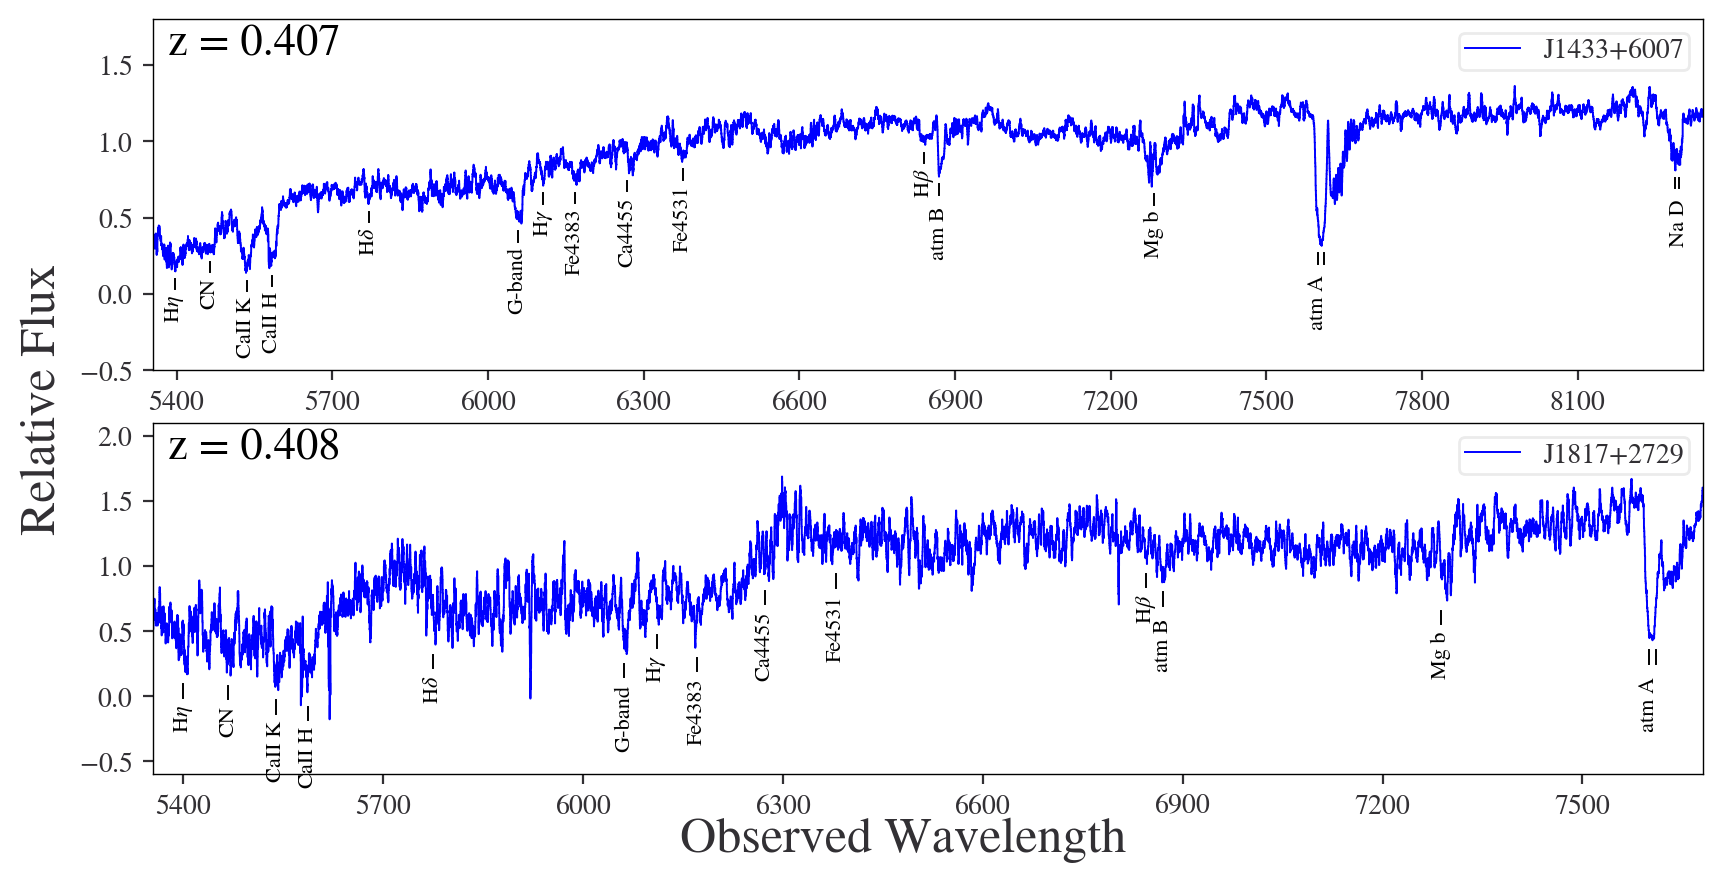

In [79]:
fg = plt.figure(figsize=(10, 5))
rows = 2
columns = 1
gs = gridspec.GridSpec(rows, columns, figure=fg)

for i in range(rows):
    ax1 = fg.add_subplot(gs[i, 0])
    i = i+5
    if i>1:
        norm=np.median(lens_sys[i]['flux'][trim_sp[i][0]+trim_offset[i][0]:trim_sp[i][1]+trim_offset[i][1]])
        spec =spec1d.Spec1d(wav=lens_sys[i]['wav'], flux=lens_sys[i]['flux']/norm, verbose=False, 
                    trimsec=[trim_sp[i][0]+trim_offset[i][0], trim_sp[i][1]+trim_offset[i][1]])
    else:
        spec =spec1d.Spec1d(wav=lens_sys[i]['wav'], flux=lens_sys[i]['flux'], verbose=False,
                            trimsec=[trim_sp[i][0]+trim_offset[i][0], trim_sp[i][1]+trim_offset[i][1]])
        
    spec.smooth(smoothing[i], showzero=False, label=lens_name[i], title=None, xlabel=None, fontsize=8,
               fig=fg, ax=ax1, ylabel=None)
    spec.mark_lines('abs', z=lens_z[i], usesmooth=True, excludeline=exclude_line[i], labfs=8)
    plt.legend(fontsize=10)
    plt.ylim(ylim_list[i])
    plt.xticks(np.arange(xtick_start[i], spec['wav'][-1], 300))
    ax1.tick_params(axis='both', labelsize=10)
    plt.subplots_adjust(hspace=0.15)
fg.text(0.5, 0.06, 'Observed Wavelength', ha='center', va='center', fontsize=18)
fg.text(0.07, 0.5, 'Relative Flux', ha='center', va='center', rotation='vertical', fontsize=18)
plt.savefig('paper_plots/1d_spec_2.pdf', format='pdf', dpi=400, bbox_inches='tight')


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-theta       3797.00       5915.73
H-eta         3835.00       5974.93
CN bandhd     3883.00       6049.71
CaII K        3933.67       6128.66
CaII H        3968.47       6182.88
H-delta       4101.00       6389.36
G-band        4305.00       6707.19
H-gamma       4340.00       6761.72
Fe4383        4383.00       6828.71
Ca4455        4455.00       6940.89
Fe4531        4531.00       7059.30
H-beta        4861.00       7573.44
Mg I (b)      5176.00       8064.21



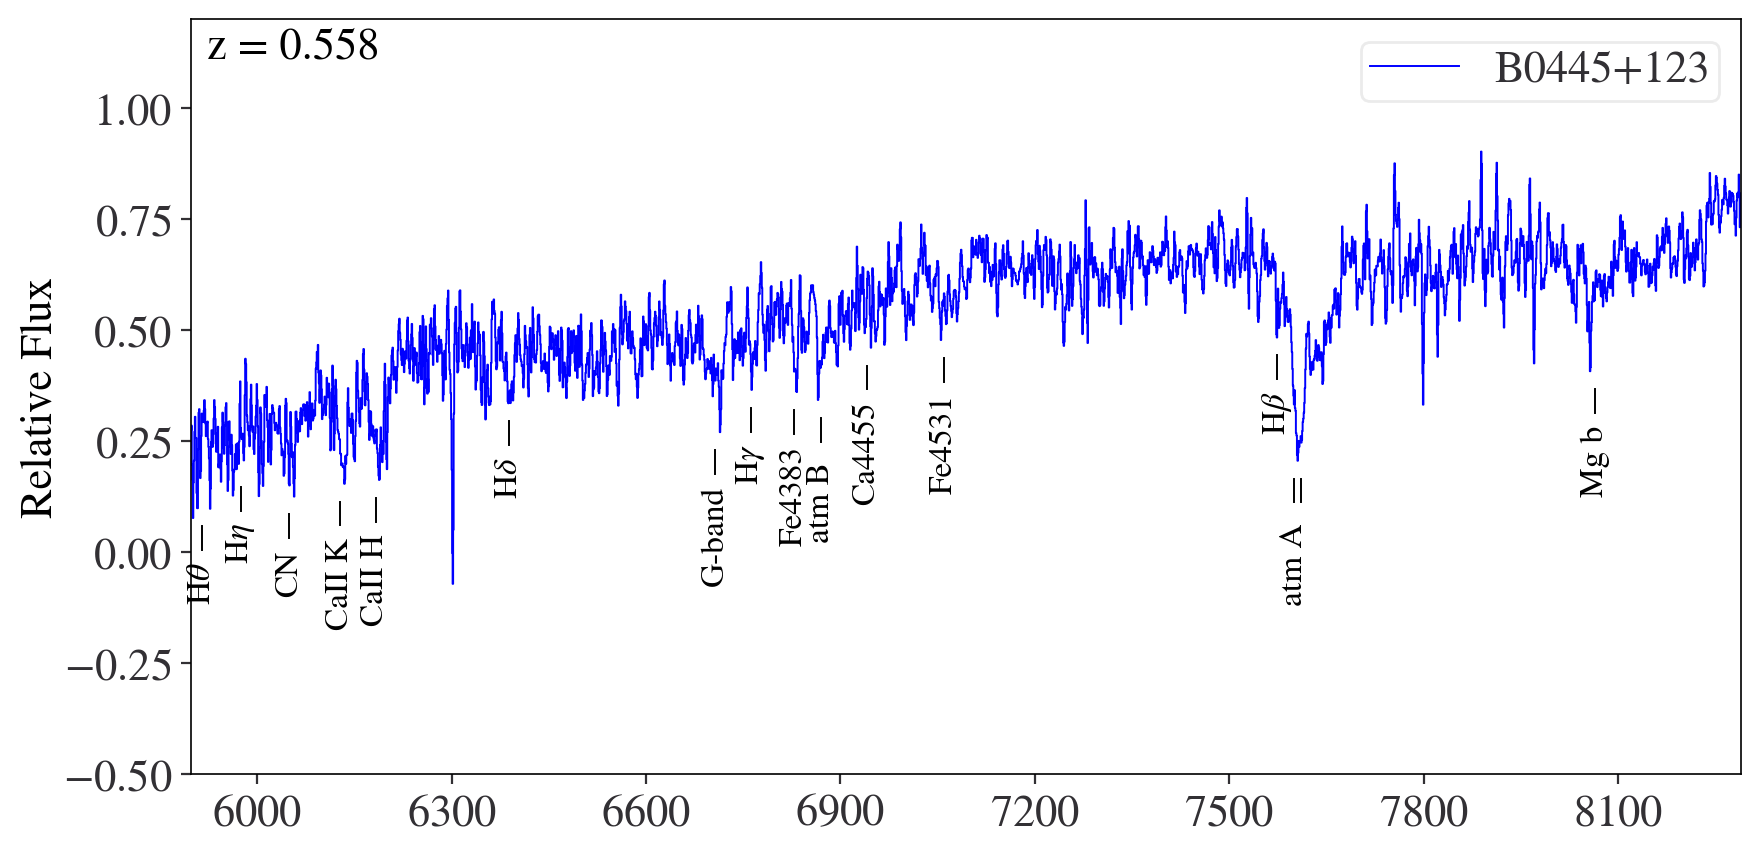

In [24]:
#B0445 plot
norm = np.median(B0445_spec['flux'][trim_sp[0][0]:trim_sp[0][1]])

spec =spec1d.Spec1d(wav=B0445_spec['wav'], flux=B0445_spec['flux'],
                    verbose=False, trimsec=[trim_sp[0][0]+110, trim_sp[0][1]+400])

spec.smooth(3, showzero=False, label=lens_name[0], title=None, xlabel=None, fontsize=16)
spec.mark_lines('abs', z=lens_z[0], usesmooth=True, excludeline=None)#['H-delta', 'atm B'])
plt.legend()
plt.ylim([-0.5, 1.2])
plt.xticks(np.arange(6000, spec['wav'][-1], 300))
plt.savefig('paper_plots/B0445_spec.pdf', format='pdf', dpi=200, bbox_inches='tight')


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       6212.70
CN bandhd     3883.00       6290.46
CaII K        3933.67       6372.55
CaII H        3968.47       6428.92
H-delta       4101.00       6643.62
G-band        4305.00       6974.10
H-gamma       4340.00       7030.80
Fe4383        4383.00       7100.46
Ca4455        4455.00       7217.10
Fe4531        4531.00       7340.22
H-beta        4861.00       7874.82
Mg I (b)      5176.00       8385.12



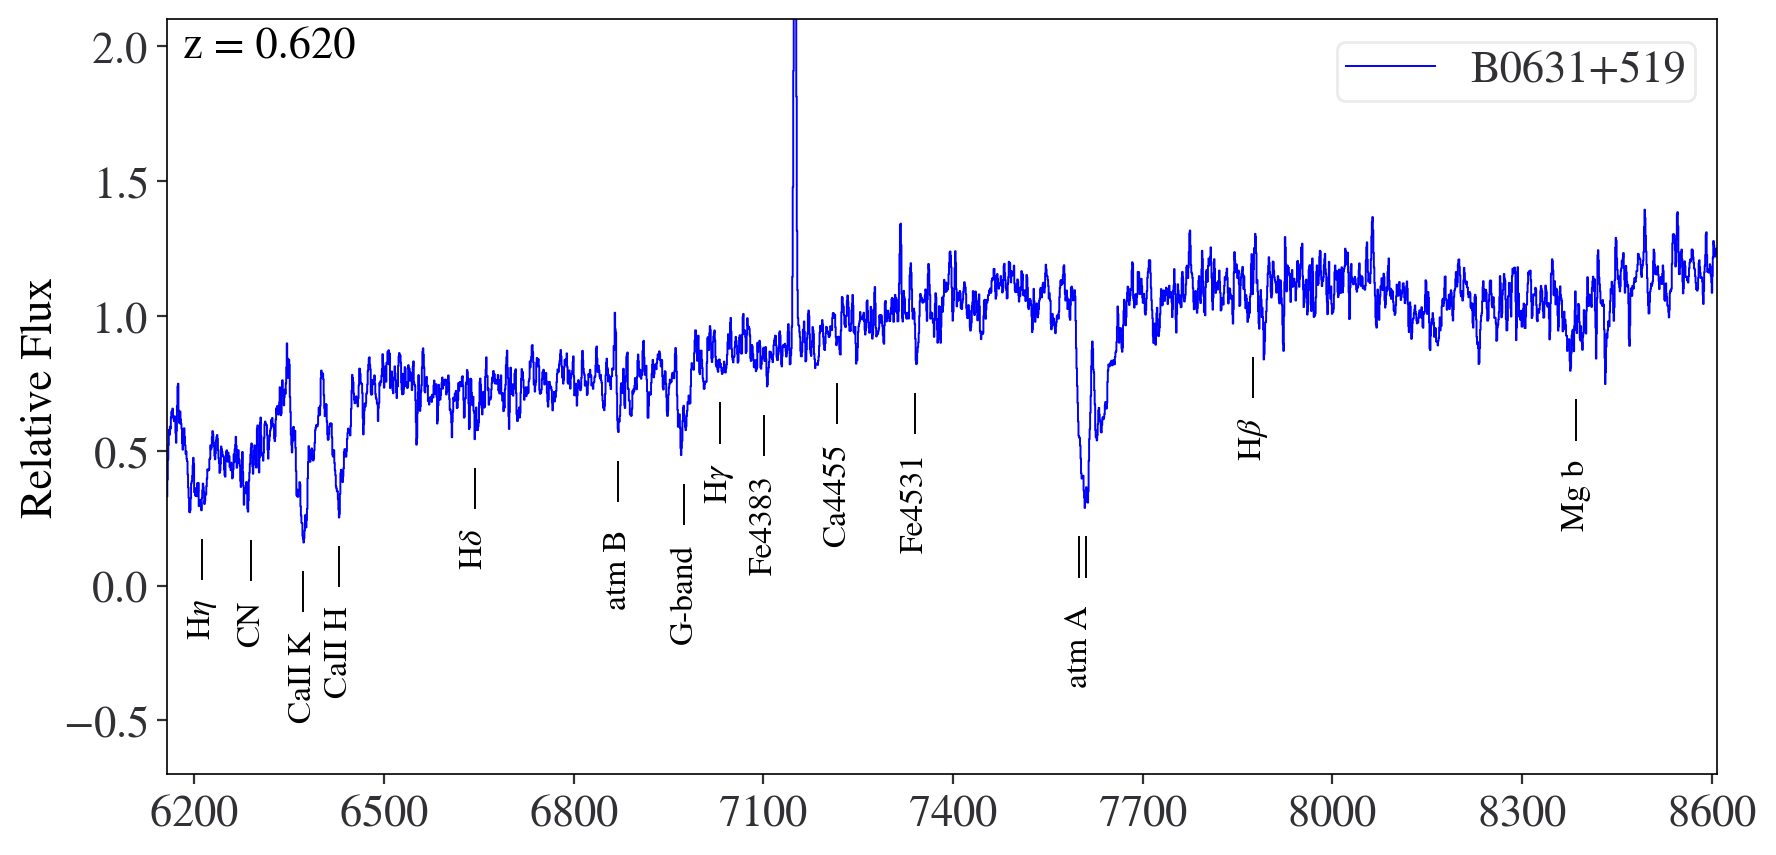

In [25]:
# B0631 plot
norm = np.median(B0631_spec['flux'][trim_sp[1][0]:trim_sp[1][1]])

spec =spec1d.Spec1d(wav=B0631_spec['wav'], flux=B0631_spec['flux'],
                    verbose=False, trimsec=trim_sp[1])

spec.smooth(3, showzero=False, label=lens_name[1], title=None, xlabel=None, fontsize=16)
spec.mark_lines('abs', z=lens_z[1], usesmooth=True, excludeline=None) #['H-delta', 'atm B'])
plt.legend()
plt.ylim([-0.7, 2.1])
plt.xticks(np.arange(6200, spec['wav'][-1], 300))
plt.savefig('paper_plots/B0631_spec.pdf', format='pdf', dpi=200, bbox_inches='tight')


Line        lambda_rest  lambda_obs
----------  -----------  -----------
CaII K        3933.67       6600.70
CaII H        3968.47       6659.09
H-delta       4101.00       6881.48
G-band        4305.00       7223.79
H-gamma       4340.00       7282.52
Fe4383        4383.00       7354.67
Ca4455        4455.00       7475.49
Fe4531        4531.00       7603.02
H-beta        4861.00       8156.76
Mg I (b)      5176.00       8685.33



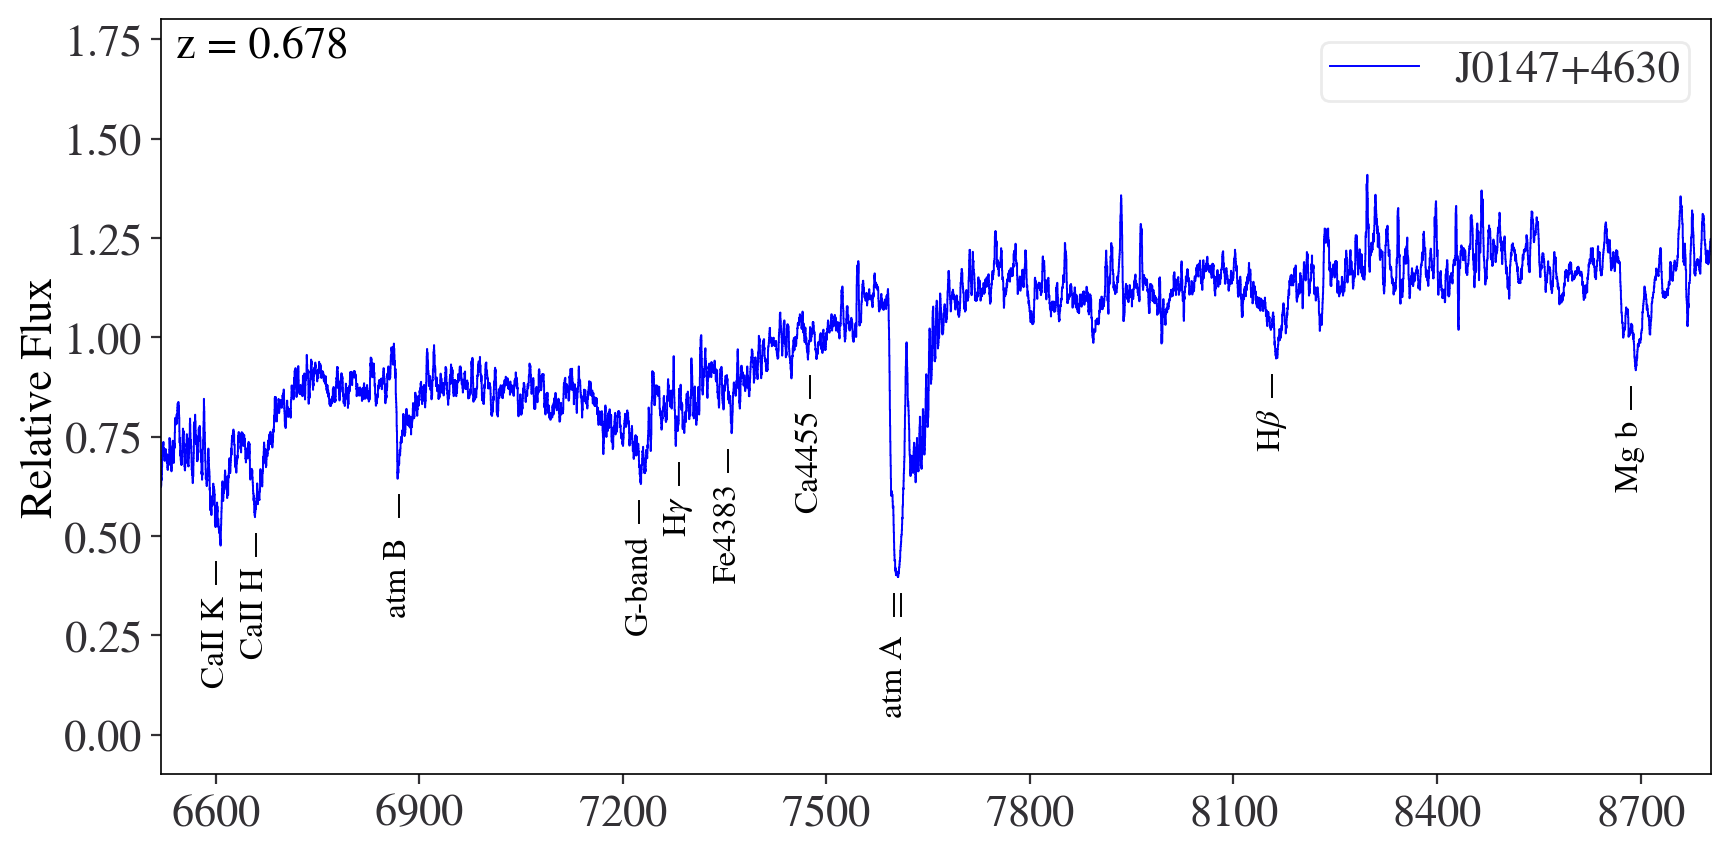

In [26]:
# J0147 plot
norm = np.median(J0147_spec['flux'][trim_sp[2][0]-100:trim_sp[2][1]+750])

spec =spec1d.Spec1d(wav=J0147_spec['wav'][trim_sp[2][0]-100:trim_sp[2][1]+750], 
                    flux=J0147_spec['flux'][trim_sp[2][0]-100:trim_sp[2][1]+750]/norm,
                    verbose=False)

spec.smooth(11, showzero=False, label=lens_name[2], title=None, xlabel=None, fontsize=16)
spec.mark_lines('abs', z=lens_z[2], usesmooth=True, excludeline=['H-delta','Fe4531'])
plt.legend()
plt.ylim([-0.1, 1.8])
plt.xticks(np.arange(6600, spec['wav'][-1], 300))
#plt.yticks(np.arange(0, max(y), 2))
#plt.plot([7610, 7610], [40, 42], 'k')
#plt.plot([7620, 7620], [40, 42], 'k')
#plt.plot([5870, 5870], [0.08, -0.08], 'k')
#plt.text( 7610, 48, 'atm', rotation='vertical', color='k', fontsize=14, ha='center', va='top')
#plt.text( 5872, -0.15, 'atm', rotation='vertical', color='k', fontsize=14, ha='center', va='top')

plt.savefig('paper_plots/J0147_spec.pdf', format='pdf', dpi=200, bbox_inches='tight')


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       7156.11
CN bandhd     3883.00       7245.68
CaII K        3933.67       7340.23
CaII H        3968.47       7405.17
H-delta       4101.00       7652.47
G-band        4305.00       8033.13
H-gamma       4340.00       8098.44
Fe4383        4383.00       8178.68
Ca4455        4455.00       8313.03
Fe4531        4531.00       8454.85
H-beta        4861.00       9070.63



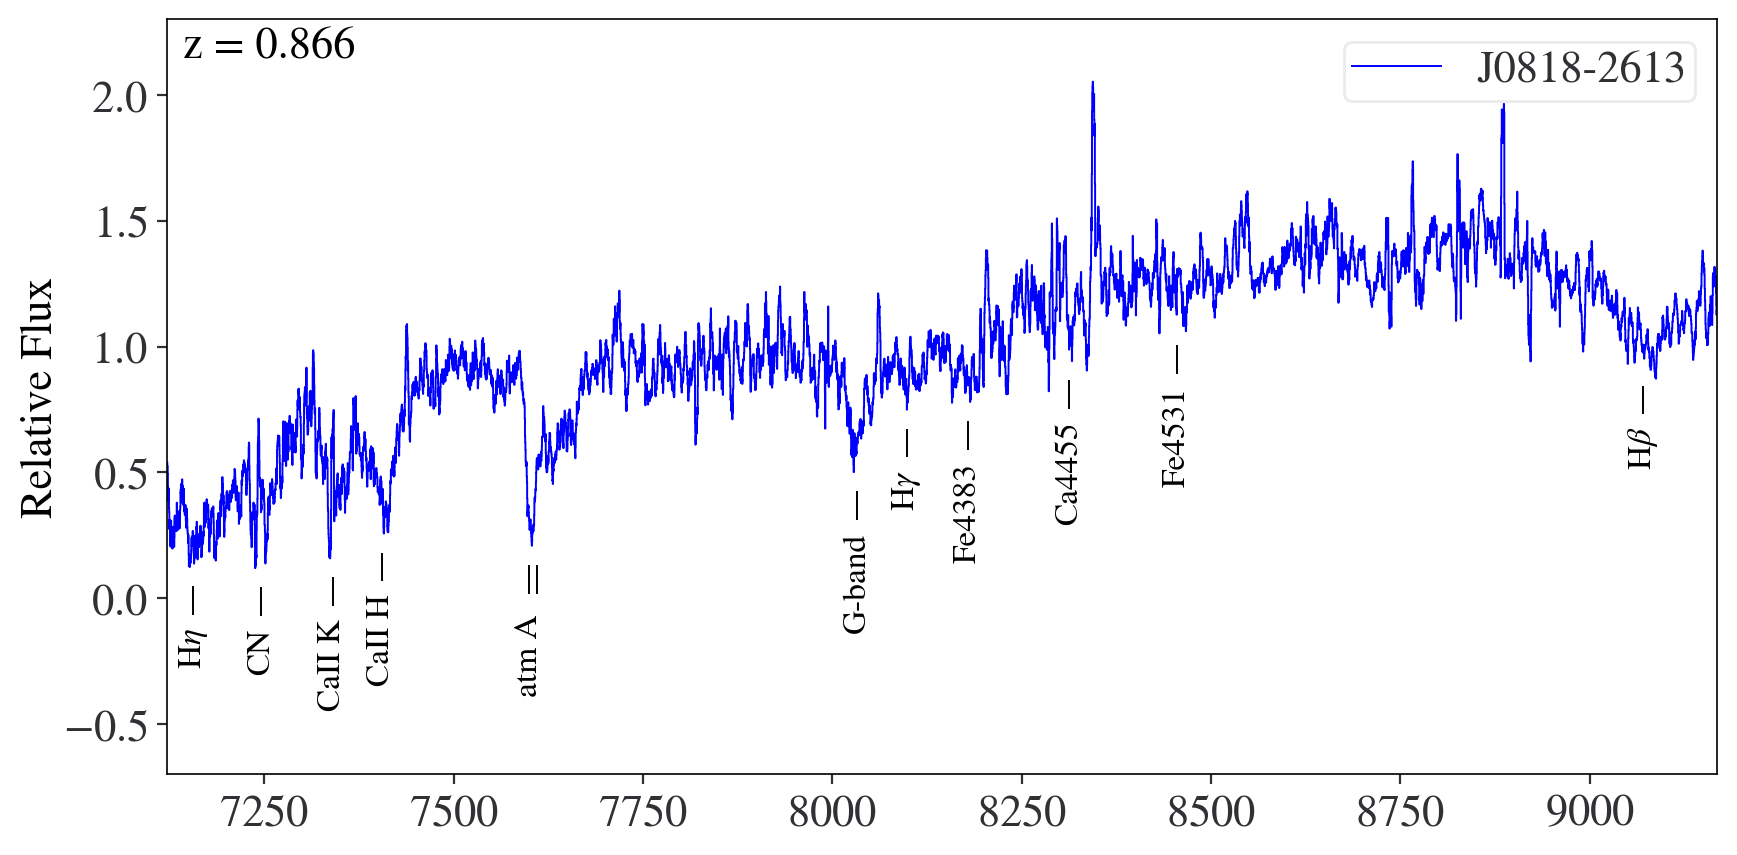

In [34]:
# J0818 plot

norm = np.median(J0818_spec['flux'][trim_sp[3][0]:trim_sp[3][1]])

spec =spec1d.Spec1d(wav=J0818_spec['wav'], flux=J0818_spec['flux']/norm,
                    verbose=False, trimsec=trim_sp[3])

spec.smooth(13, showzero=False, label=lens_name[3], title=None, xlabel=None, fontsize=16)
spec.mark_lines('abs', z=lens_z[3], usesmooth=True, excludeline=['H-delta', 'atm B'])
plt.legend()
plt.ylim([-0.7, 2.3])
#plt.xticks(np.arange(6600, spec['wav'][-1], 400))
plt.savefig('paper_plots/J0818_spec.pdf', format='pdf', dpi=200, bbox_inches='tight')


Line        lambda_rest  lambda_obs
----------  -----------  -----------
CN bandhd     3883.00       5409.02
CaII K        3933.67       5479.60
CaII H        3968.47       5528.08
H-delta       4101.00       5712.69
G-band        4305.00       5996.86
H-gamma       4340.00       6045.62
Fe4383        4383.00       6105.52
Ca4455        4455.00       6205.82
Fe4531        4531.00       6311.68
H-beta        4861.00       6771.37
Mg I (b)      5176.00       7210.17
Na I (D)      5889.95       8204.70
Na I (D)      5895.92       8213.02



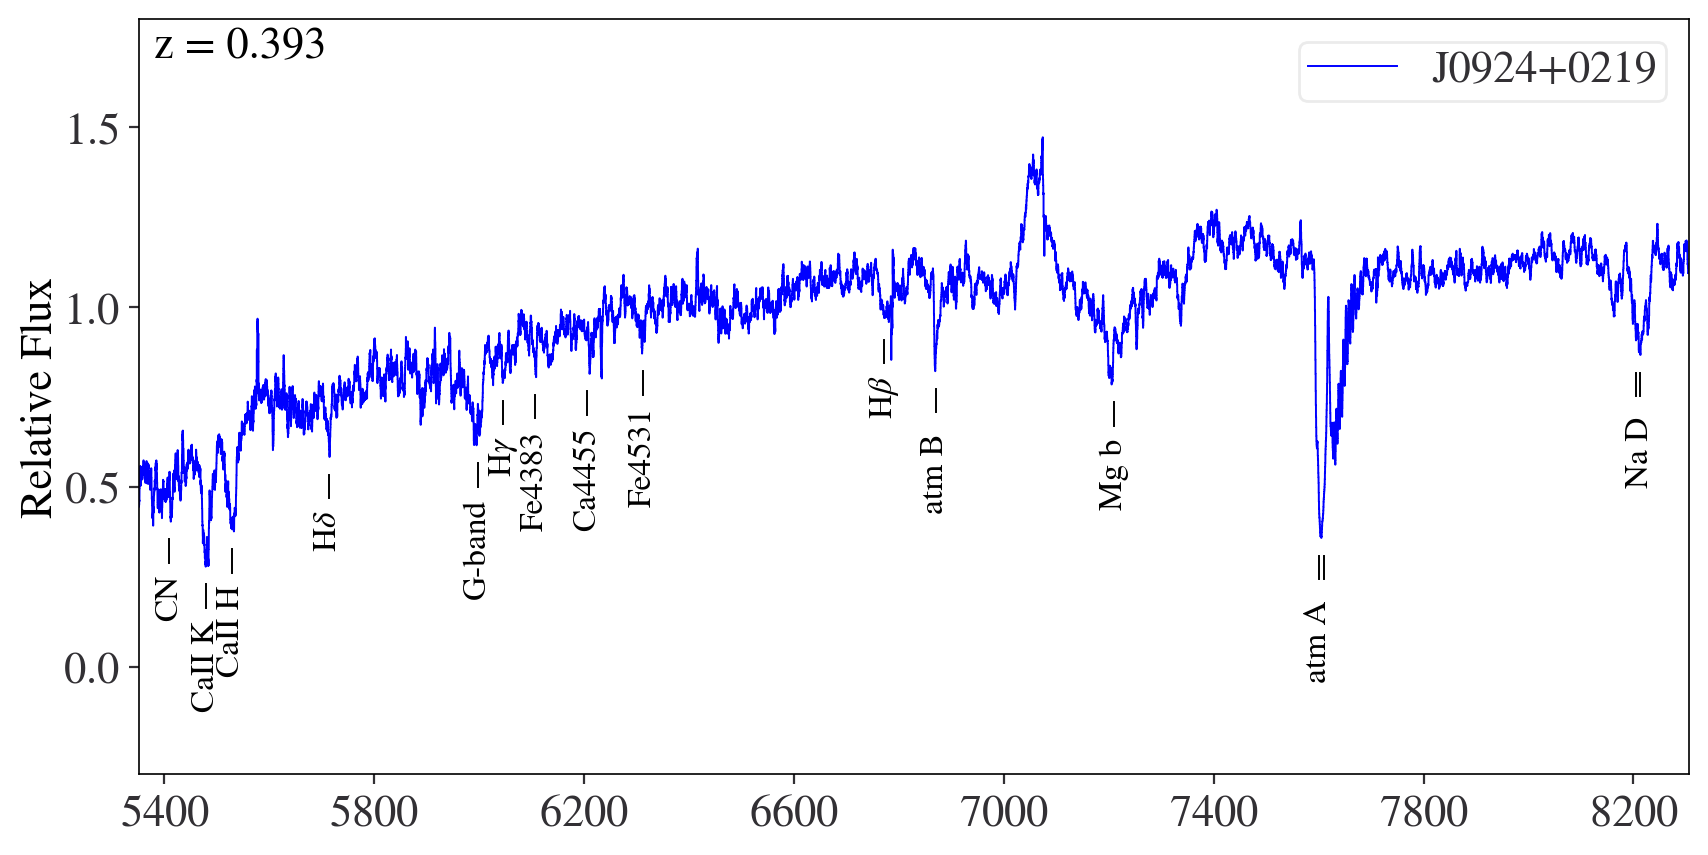

In [30]:
# J0924 plot

norm = np.median(J0924_spec['flux'][trim_sp[4][0]:trim_sp[4][1]])

spec =spec1d.Spec1d(wav=J0924_spec['wav'], flux=J0924_spec['flux']/norm,
                    verbose=False, trimsec=trim_sp[4])

spec.smooth(11, showzero=False, label=lens_name[4], title=None, xlabel=None, fontsize=16)
spec.mark_lines('abs', z=lens_z[4], usesmooth=True, excludeline=None)
plt.legend()
plt.ylim([-0.3, 1.8])
plt.xticks(np.arange(5400, spec['wav'][-1], 400))
plt.savefig('paper_plots/J0924_spec.pdf', format='pdf', dpi=200, bbox_inches='tight')


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       5395.85
CN bandhd     3883.00       5463.38
CaII K        3933.67       5534.67
CaII H        3968.47       5583.64
H-delta       4101.00       5770.11
G-band        4305.00       6057.14
H-gamma       4340.00       6106.38
Fe4383        4383.00       6166.88
Ca4455        4455.00       6268.19
Fe4531        4531.00       6375.12
H-beta        4861.00       6839.43
Mg I (b)      5176.00       7282.63
Na I (D)      5889.95       8287.16
Na I (D)      5895.92       8295.56



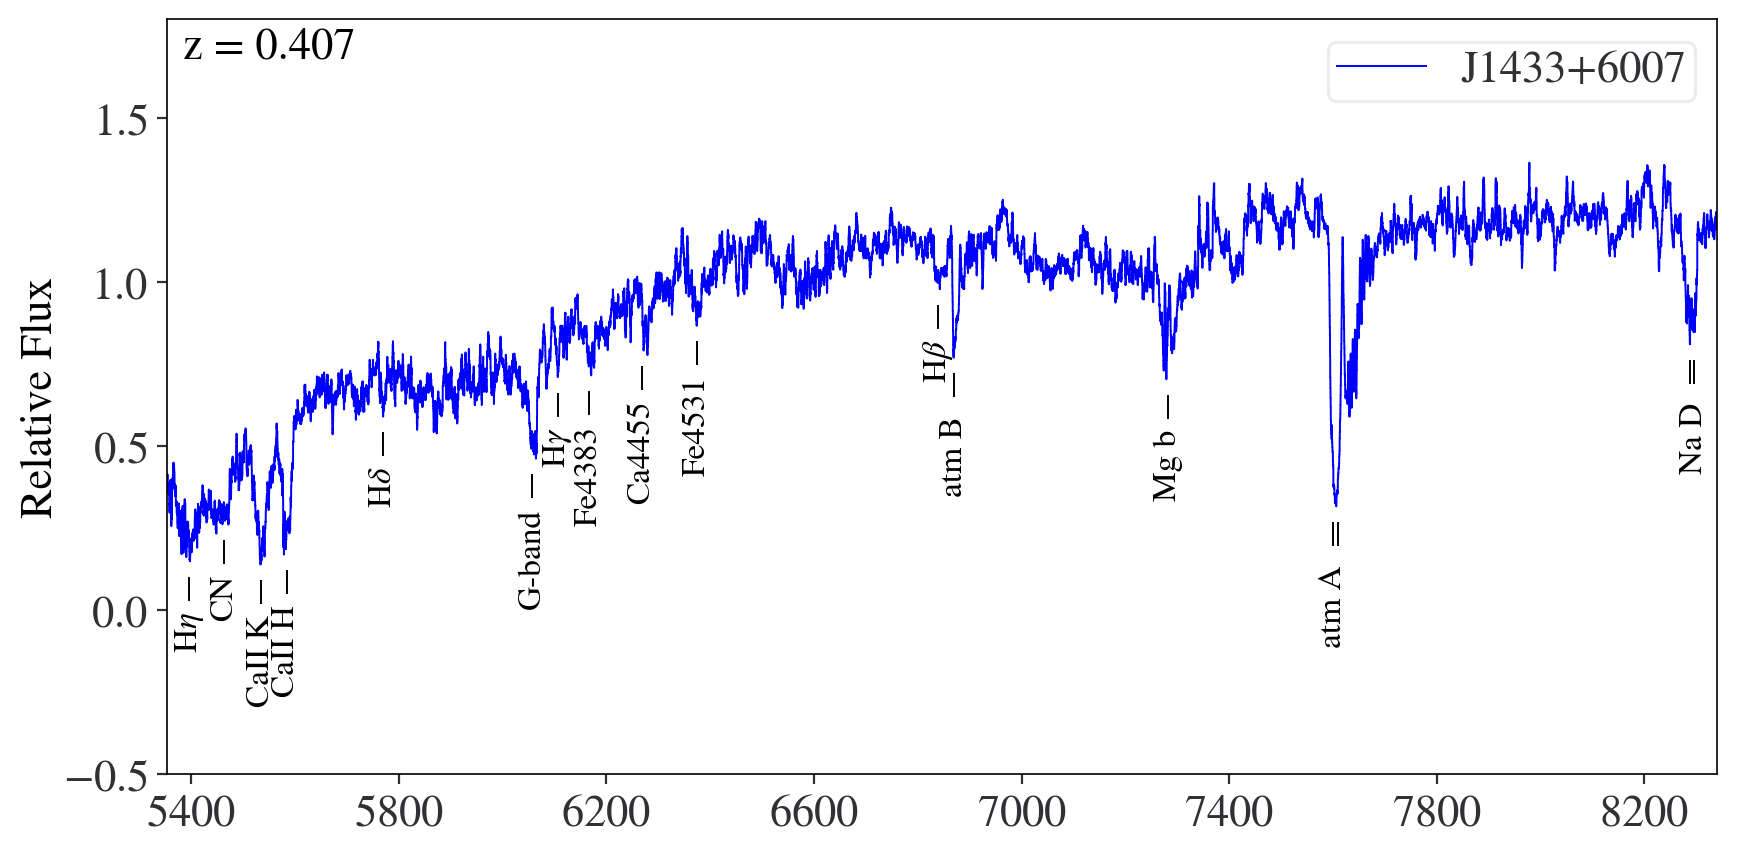

In [31]:
# J1433 plot
norm = np.median(J1433_spec['flux'][trim_sp[5][0]+500:trim_sp[5][1]])

spec =spec1d.Spec1d(wav=J1433_spec['wav'], flux=J1433_spec['flux']/norm,
                    verbose=False, trimsec=[trim_sp[5][0]+500, trim_sp[5][1]])

spec.smooth(11, showzero=False, label=lens_name[5], title=None, xlabel=None, fontsize=16)
spec.mark_lines('abs', z=lens_z[5], usesmooth=True, excludeline=None)
plt.legend()
plt.ylim([-0.5, 1.8])
plt.xticks(np.arange(5400, spec['wav'][-1], 400))
plt.savefig('paper_plots/J1433_spec.pdf', format='pdf', dpi=200, bbox_inches='tight')


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       5399.68
CN bandhd     3883.00       5467.26
CaII K        3933.67       5538.61
CaII H        3968.47       5587.61
H-delta       4101.00       5774.21
G-band        4305.00       6061.44
H-gamma       4340.00       6110.72
Fe4383        4383.00       6171.26
Ca4455        4455.00       6272.64
Fe4531        4531.00       6379.65
H-beta        4861.00       6844.29
Mg I (b)      5176.00       7287.81



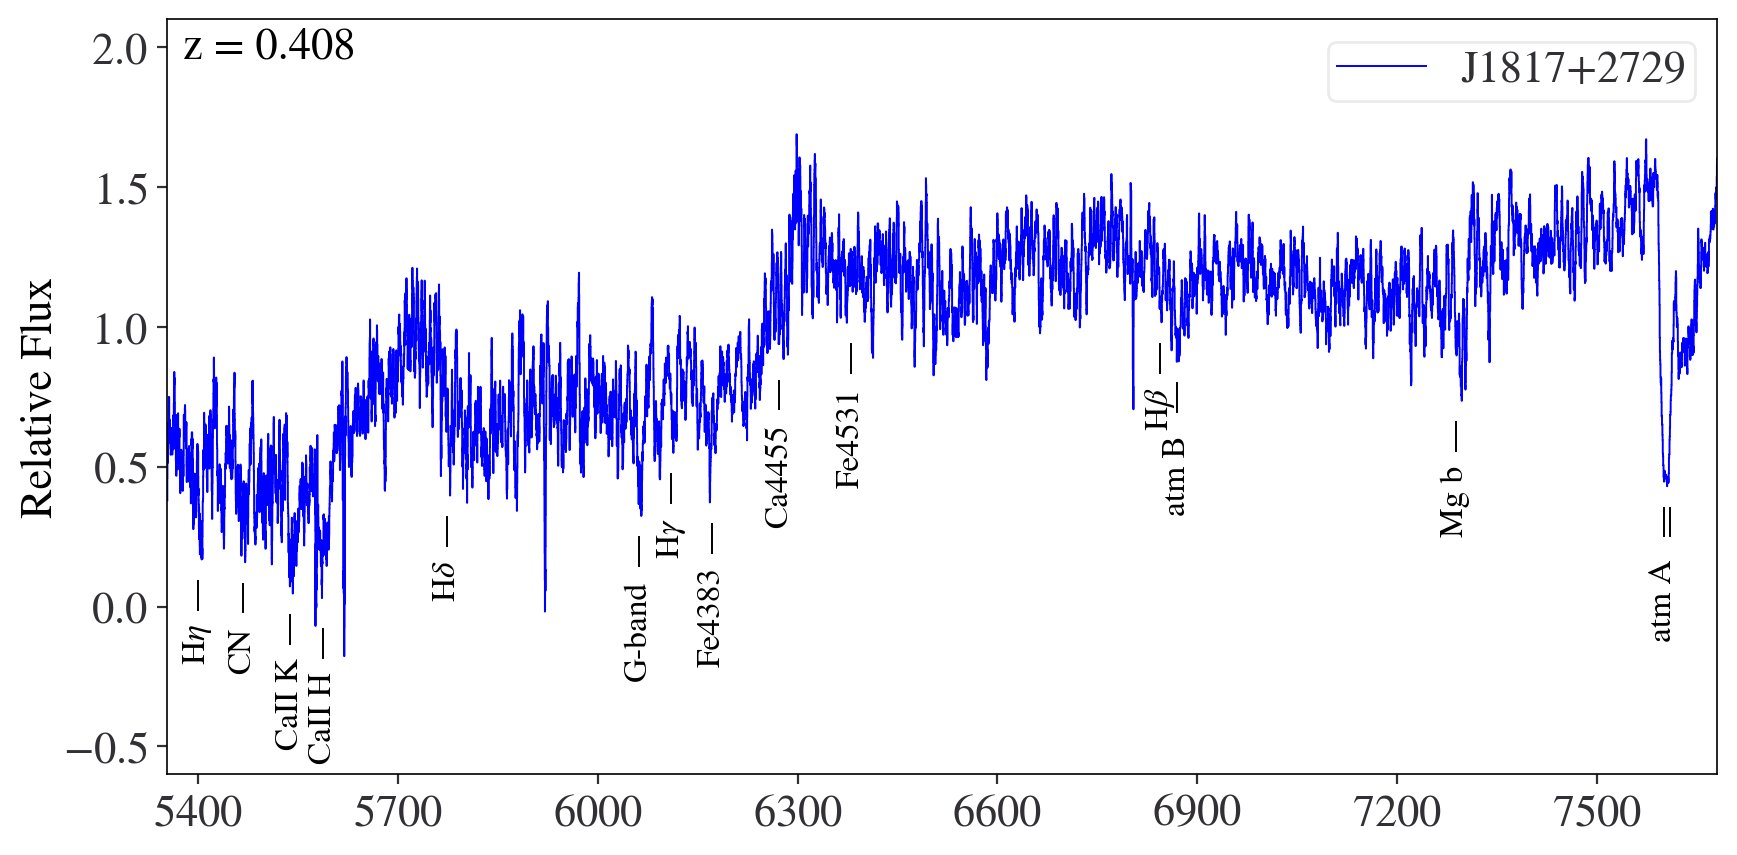

In [36]:
# J1817 plot
norm = np.median(J1817_spec['flux'][trim_sp[6][0]:trim_sp[6][1]+2000])

spec =spec1d.Spec1d(wav=J1817_spec['wav'], flux=J1817_spec['flux']/norm,
                    verbose=False, trimsec=[trim_sp[6][0], trim_sp[6][1]+2000])

spec.smooth(13, showzero=False, label=lens_name[6], title=None, xlabel=None, fontsize=16)
spec.mark_lines('abs', z=lens_z[6], usesmooth=True, excludeline=None)#['atm A'])
plt.legend()
plt.ylim([-0.6, 2.1])
plt.xticks(np.arange(5400, spec['wav'][-1], 300))
plt.savefig('paper_plots/J1817_spec.pdf', format='pdf', dpi=200, bbox_inches='tight')

 Spectrum Start:  5810.46
 Spectrum End:     7969.83
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       5842.50
[Fe VII]      3761.40       5860.26
H-iota        3770.00       5873.66
H-theta       3797.00       5915.73
H-eta         3835.00       5974.93
CN bandhd     3883.00       6049.71
CaII K        3933.67       6128.66
CaII H        3968.47       6182.88
H-delta       4101.00       6389.36
G-band        4305.00       6707.19
H-gamma       4340.00       6761.72
Fe4383        4383.00       6828.71
Ca4455        4455.00       6940.89
Fe4531        4531.00       7059.30
H-beta        4861.00       7573.44



Text(5872, -0.15, 'atm')

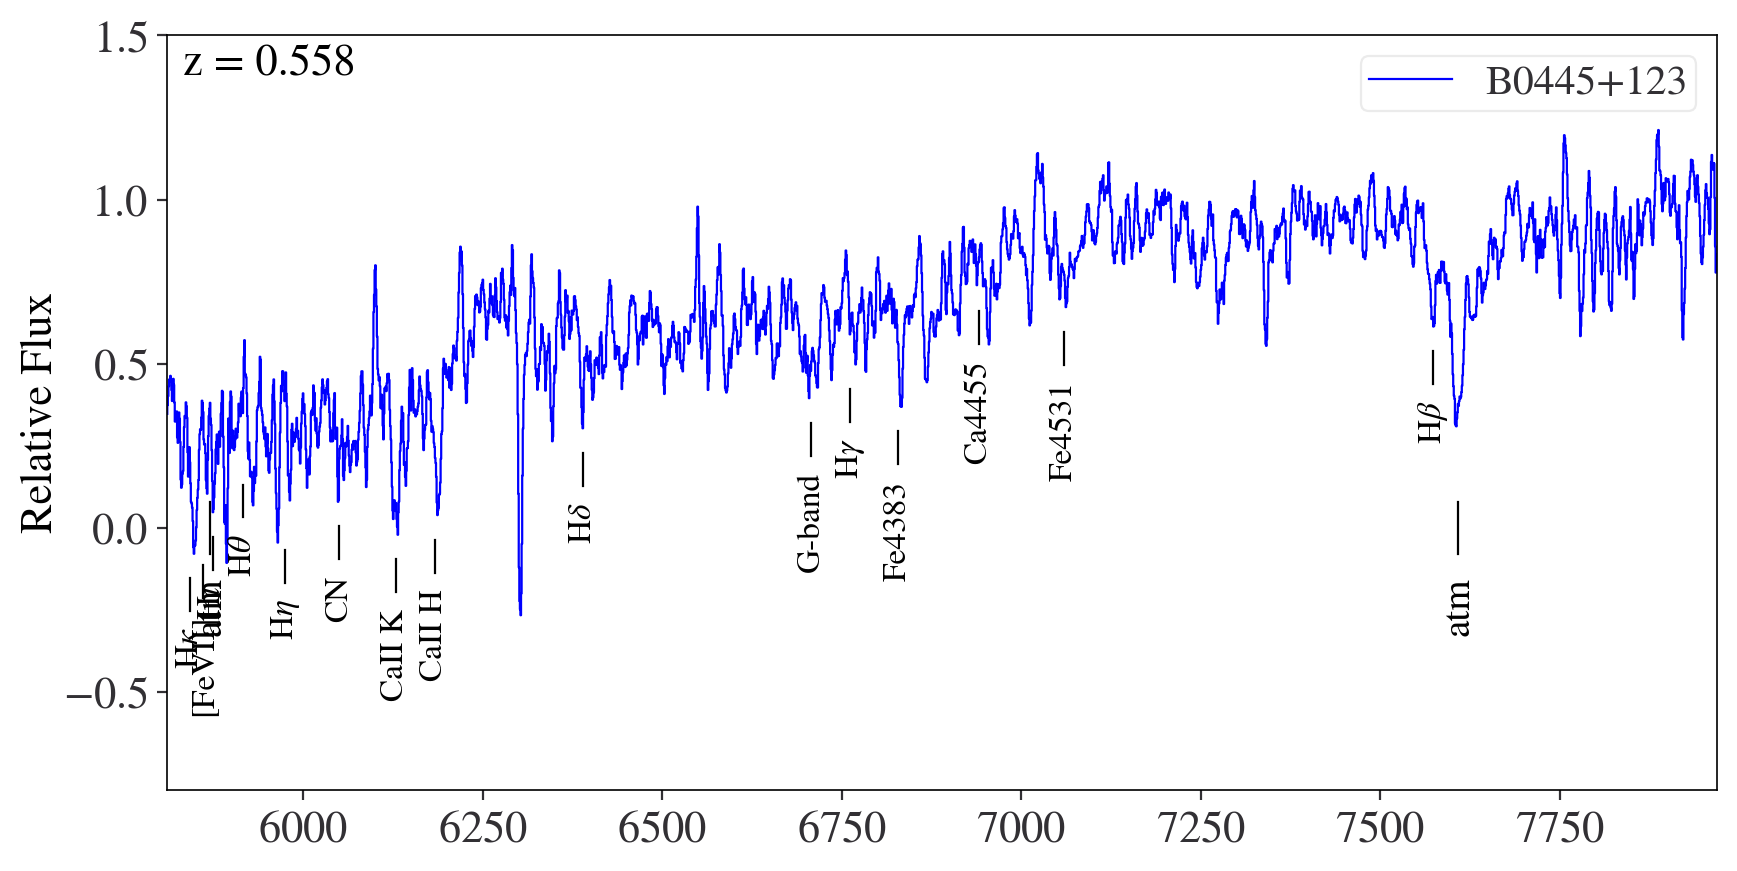

In [136]:
spec =spec1d.Spec1d(wav=B0445_spec['wav'][trim_sp[0][0]:trim_sp[0][1]], 
            flux=B0445_spec['flux'][trim_sp[0][0]:trim_sp[0][1]])#,#/np.median(B0445_spec['flux'][trim_sp[0]:trim_sp[1]]),
                    #verbose=False)
spec.smooth(7, showzero=False, label=lens_name[0], title=None, xlabel=None, fontsize=16)#, fig=fig)
spec.mark_lines('abs', z=lens_z[0], usesmooth=True)
plt.legend()
plt.ylim([-.8, 1.5])
plt.plot([7609, 7609], [0.08, -0.08], 'k')
plt.plot([5870, 5870], [0.08, -0.08], 'k')
plt.text( 7610, -0.15, 'atm', rotation='vertical', color='k', fontsize=14, ha='center', va='top')
plt.text( 5872, -0.15, 'atm', rotation='vertical', color='k', fontsize=14, ha='center', va='top')

#plt.savefig('B0445_spec3.pdf', format='pdf', dpi=200, bbox_inches='tight')
#plt.savefig('B0445_spec1.eps', format='eps', dpi=300, bbox_inches='tight')

# Velocity dispersion plot

In [2]:
# load the spectra

B0445_spec = Veldis('../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector_Jan2022.fits', 
              informat='fits', trimsec=[200, 2900])

B0631_spec = Veldis('../spectra_extraction/B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector_Jan2022.fits', 
              informat='fits', trimsec=[635, 3699])

J0147_spec = Veldis('../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_esi_coadd2d_deflector_Jan2022.fits', 
              informat='fits', logwav=True, trimsec=[12491, -4800])

J0818_spec = Veldis('../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_esi_coadd2d_deflector_Jan2022.fits', 
              informat='fits', logwav=True, trimsec=[9821, 16471])

J0924_spec = Veldis('../spectra_extraction/J0924_ESI_spectra/spec1d_J0924_esi_coadd2d_deflector_Jan2022.fits',
              informat='fits', logwav=True, trimsec=[4289, -5584])

J1433_spec = Veldis('../spectra_extraction/J1433_ESI_spectra/spec1d_J1433_esi_coadd2d_deflector_Jan2022.fits',
                    informat='fits', trimsec=[3800, 15970], logwav=True)

J1817_spec = Veldis('../spectra_extraction/J1817_ESI_spectra/spec1d_J1817_esi_coadd2d_deflector_Jan2022.fits', 
              informat='fits', logwav=True, trimsec=[4300, 11800])


Reading spectrum from ../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector_Jan2022.fits
Expected file format: fits
 Spectrum Start:  5810.46
 Spectrum End:     7969.83
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Reading spectrum from ../spectra_extraction/B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector_Jan2022.fits
Expected file format: fits
 Spectrum Start:  6157.39
 Spectrum End:     8607.96
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Reading spectrum from ../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_esi_coadd2d_deflector_Jan2022.fits
Expected file format: fits
 Spectrum Start:  6544.12
 Spectrum End:     8556.09
 Dispersion (1st pixel):   0.25
 Dispersion (average):      0.29


Reading spectrum from ../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_esi_coadd2d_deflector_Jan2022.fits
Expected file format: fits
 Spectrum Start:  7121.92
 Spectrum End:     9168.65
 Dispersion (1st pixel):   0.27
 D

In [3]:
# load the best fit models
bst_data = ['../velocity_dispersion/B0445_bestfit_veldis.txt',
            '../velocity_dispersion/B0631_LRIS_bestfit_veldis_new.txt',
            '../velocity_dispersion/J0147_bestfit_veldis.txt',
            '../velocity_dispersion/J0818_bestfit_veldis_new.txt',
            '../velocity_dispersion/J0924_bestfit_veldis.txt',
            '../velocity_dispersion/J1433_bestfit_veldis.txt',
            '../velocity_dispersion/J1817_bestfit_veldis.txt']


The wavelength is already red shifted once. Watch out!!!
Velocity scale = 35.100309 km/s

The wavelength is already red shifted once. Watch out!!!
Velocity scale = 32.791895 km/s

The wavelength is already red shifted once. Watch out!!!
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389931 km/s

The wavelength is already red shifted once. Watch out!!!
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389929 km/s


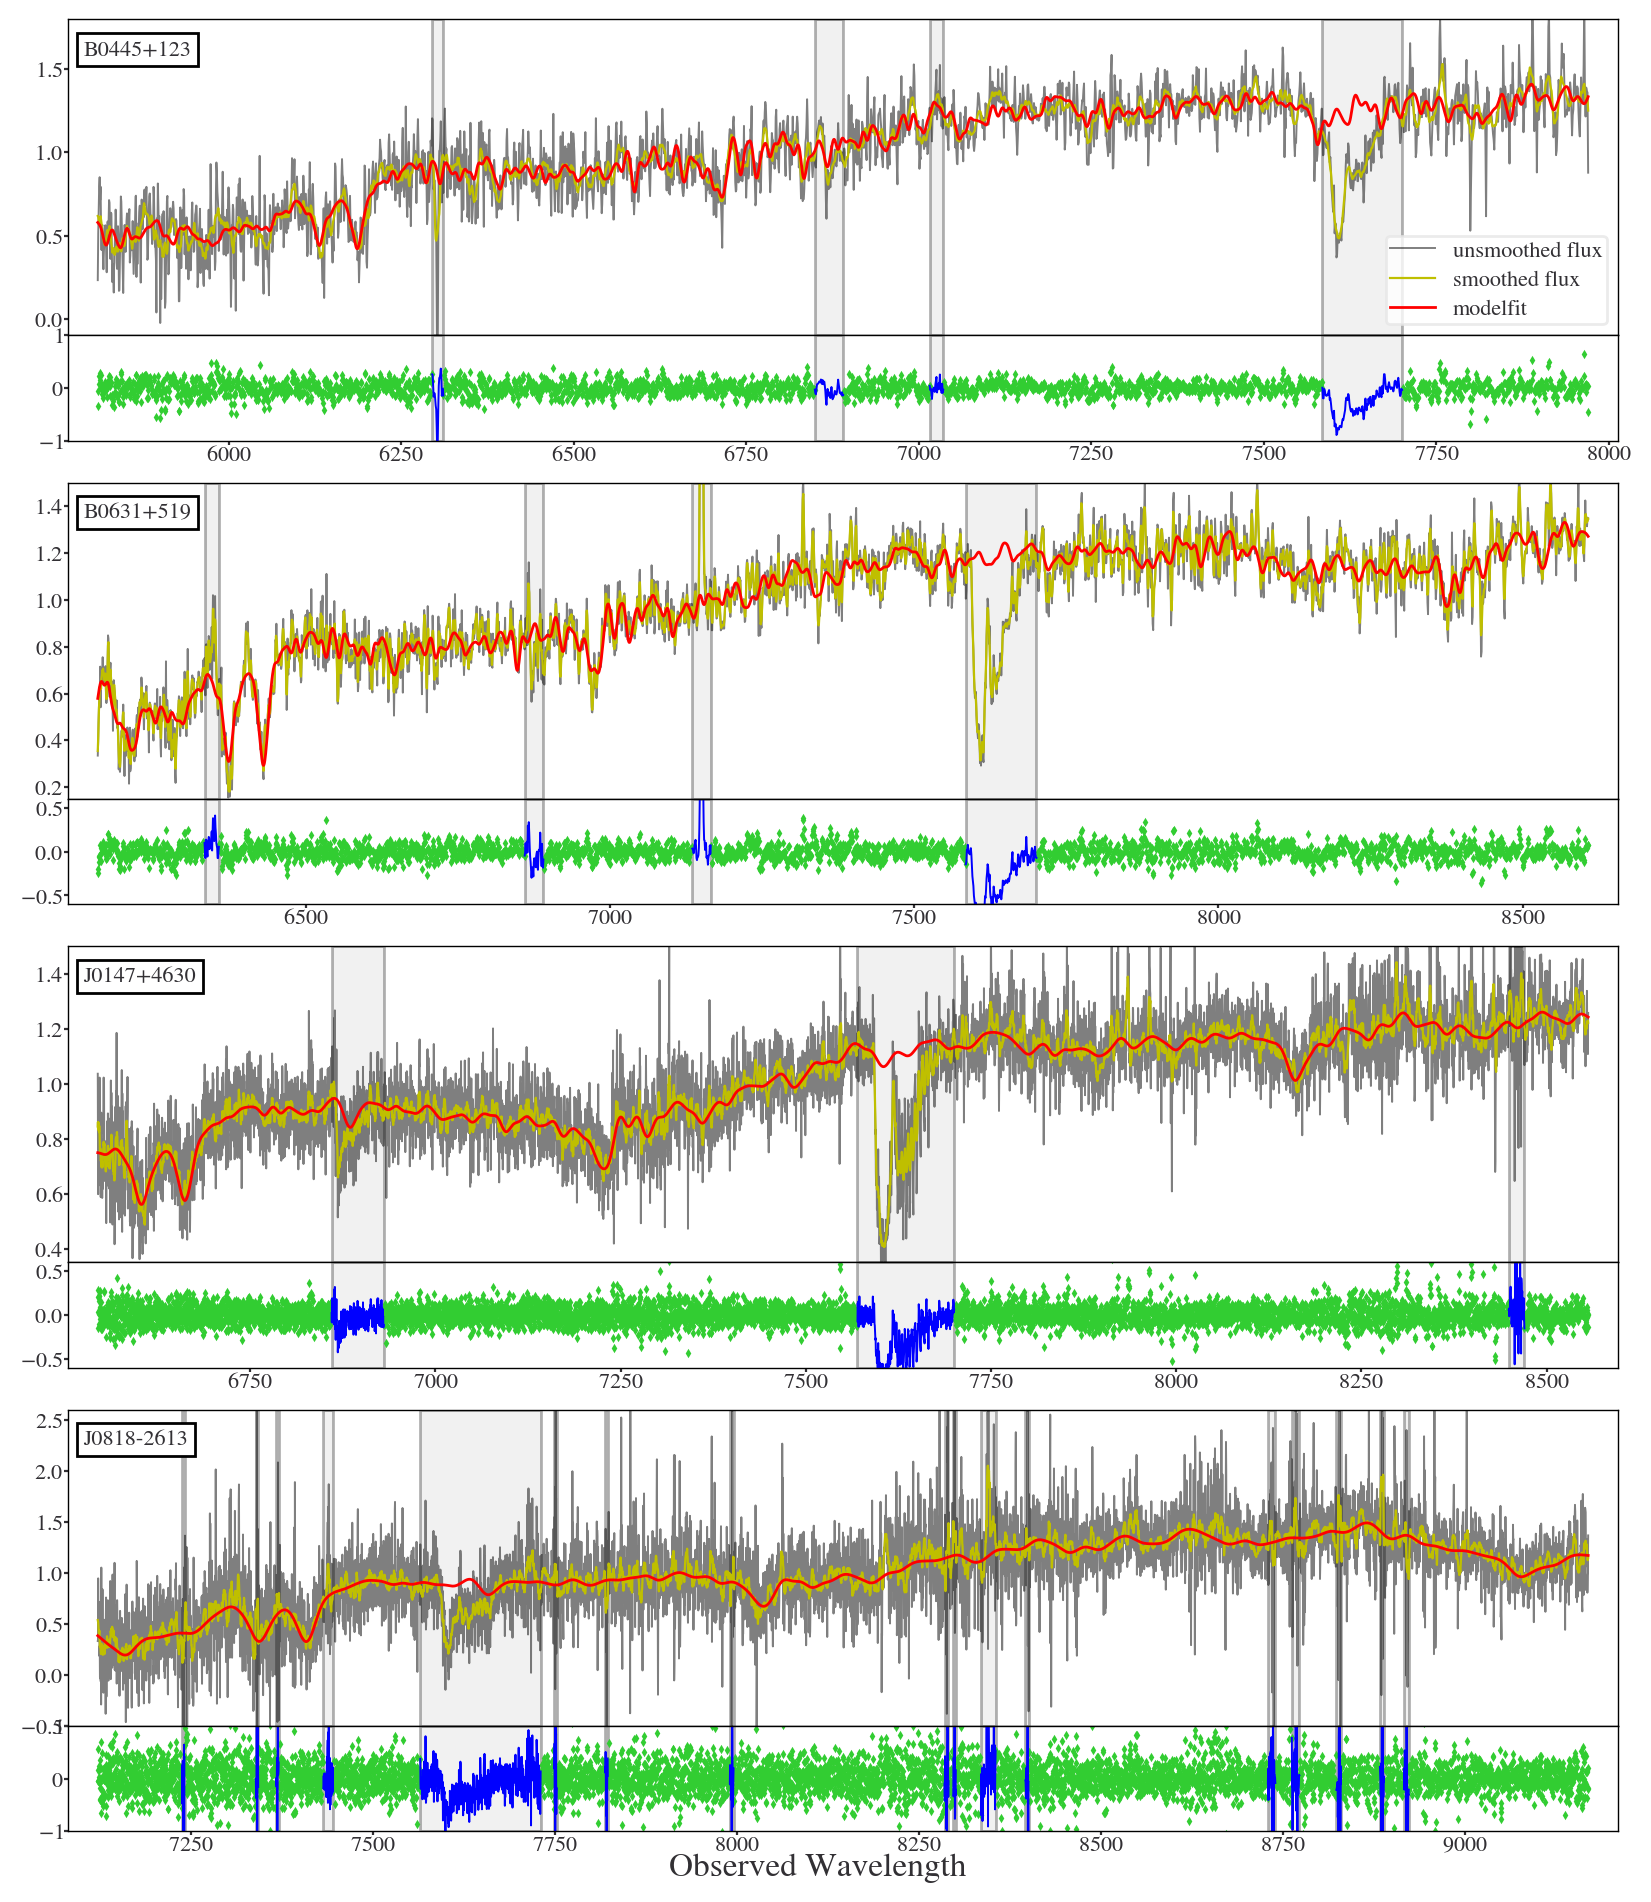

In [62]:
fg = plt.figure(figsize=(10, 12))
rows = 4
columns = 1
gs = gridspec.GridSpec(rows, columns, figure=fg)

for i, sp in enumerate(lens_sys[:4]):
    gs_sub = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[i, 0],
                                       hspace=0, height_ratios=[3, 1])
    ax1 = fg.add_subplot(gs_sub[0, 0])
    ax2 = fg.add_subplot(gs_sub[1, 0])
    
    if i < 2:
        sp.cal_parm(z=lens_z[i], high_z=True, logscale=False, veldis_start=vl_st[i],
                    noise_scale=ns_scale[i], doplot=False)
    else:
        sp.cal_parm(z=lens_z[i], high_z=True, logscale=True, veldis_start=vl_st[i],
                    noise_scale=ns_scale[i], doplot=False)
    fit_data = np.loadtxt(bst_data[i])
    
    x = np.exp(sp.wav_rebinned)*(1.0 + lens_z[i])
    ll, rr = np.min(x), np.max(x)
    gal_rebinn = spec1d.Spec1d(wav=x, flux=sp.flux_rebinned, verbose=False)
    gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize[i], verbose=False)
    bst = fit_data[0] #spec.best_fit[0]
    goodpixels = np.trim_zeros(fit_data[1], 'b').astype('int')
    
    #plt.ylabel("Relative Flux", fontsize=16)
    ax1.plot(x, gal_rebinn['flux'], color='k', label='unsmoothed flux', alpha=0.5) #'unsmoothed flux'
    ax1.plot(x, gal_smooth, color='y', linewidth=.8, label='smoothed flux',) #, label='smoothed flux'
    ax1.plot(x, bst, 'r', linewidth=1, label='modelfit') #, label='modelfit'
    w = np.flatnonzero(np.diff(goodpixels) > 1)
    for wj in w:
        a, b = goodpixels[wj : wj + 2]
        #print(x[a], x[b])
        ax1.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.3)
        
    #plt.legend(labelcolor='k')
    ax1.set_ylim(ylim1_list[i][0], ylim1_list[i][1])
    ax1.set_xticklabels([])
    ax1.tick_params(axis='y', labelsize=8, length=1.5, pad=0.05)
    ax1.set_xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
    ax1.annotate(lens_name[i], (0.01, 0.89), xycoords='axes fraction',
                 fontsize=8, bbox=dict(boxstyle='square', fc='white'))
    if i==0:
        ax1.legend(loc='lower right', fontsize=8)
    
    resid = gal_rebinn['flux'] - bst
    ax2.plot(x[goodpixels], resid[goodpixels], 'd', color='LimeGreen',
          mec='LimeGreen', ms=1)
    for wj in w:
        a, b = goodpixels[wj : wj + 2]
        ax2.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.3)
        ax2.plot(x[a : b + 1], resid[a : b + 1], 'b')

    ax2.set_xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
    ax2.set_ylim(ylim2_list[i][0], ylim2_list[i][1])
    ax2.tick_params(axis='both', labelsize=8, length=1.5, pad=0.05)
    
    plt.subplots_adjust(hspace=0.1)

    
fg.text(0.5, 0.11, 'Observed Wavelength', ha='center', va='center', fontsize=12)
#fg.text(0.07, 0.5, 'Relative Flux', ha='center', va='center', rotation='vertical', fontsize=18)
plt.savefig('paper_plots/veldis_fit_1.pdf', format='pdf', dpi=400, bbox_inches='tight')


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389943 km/s

The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389945 km/s

The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389932 km/s


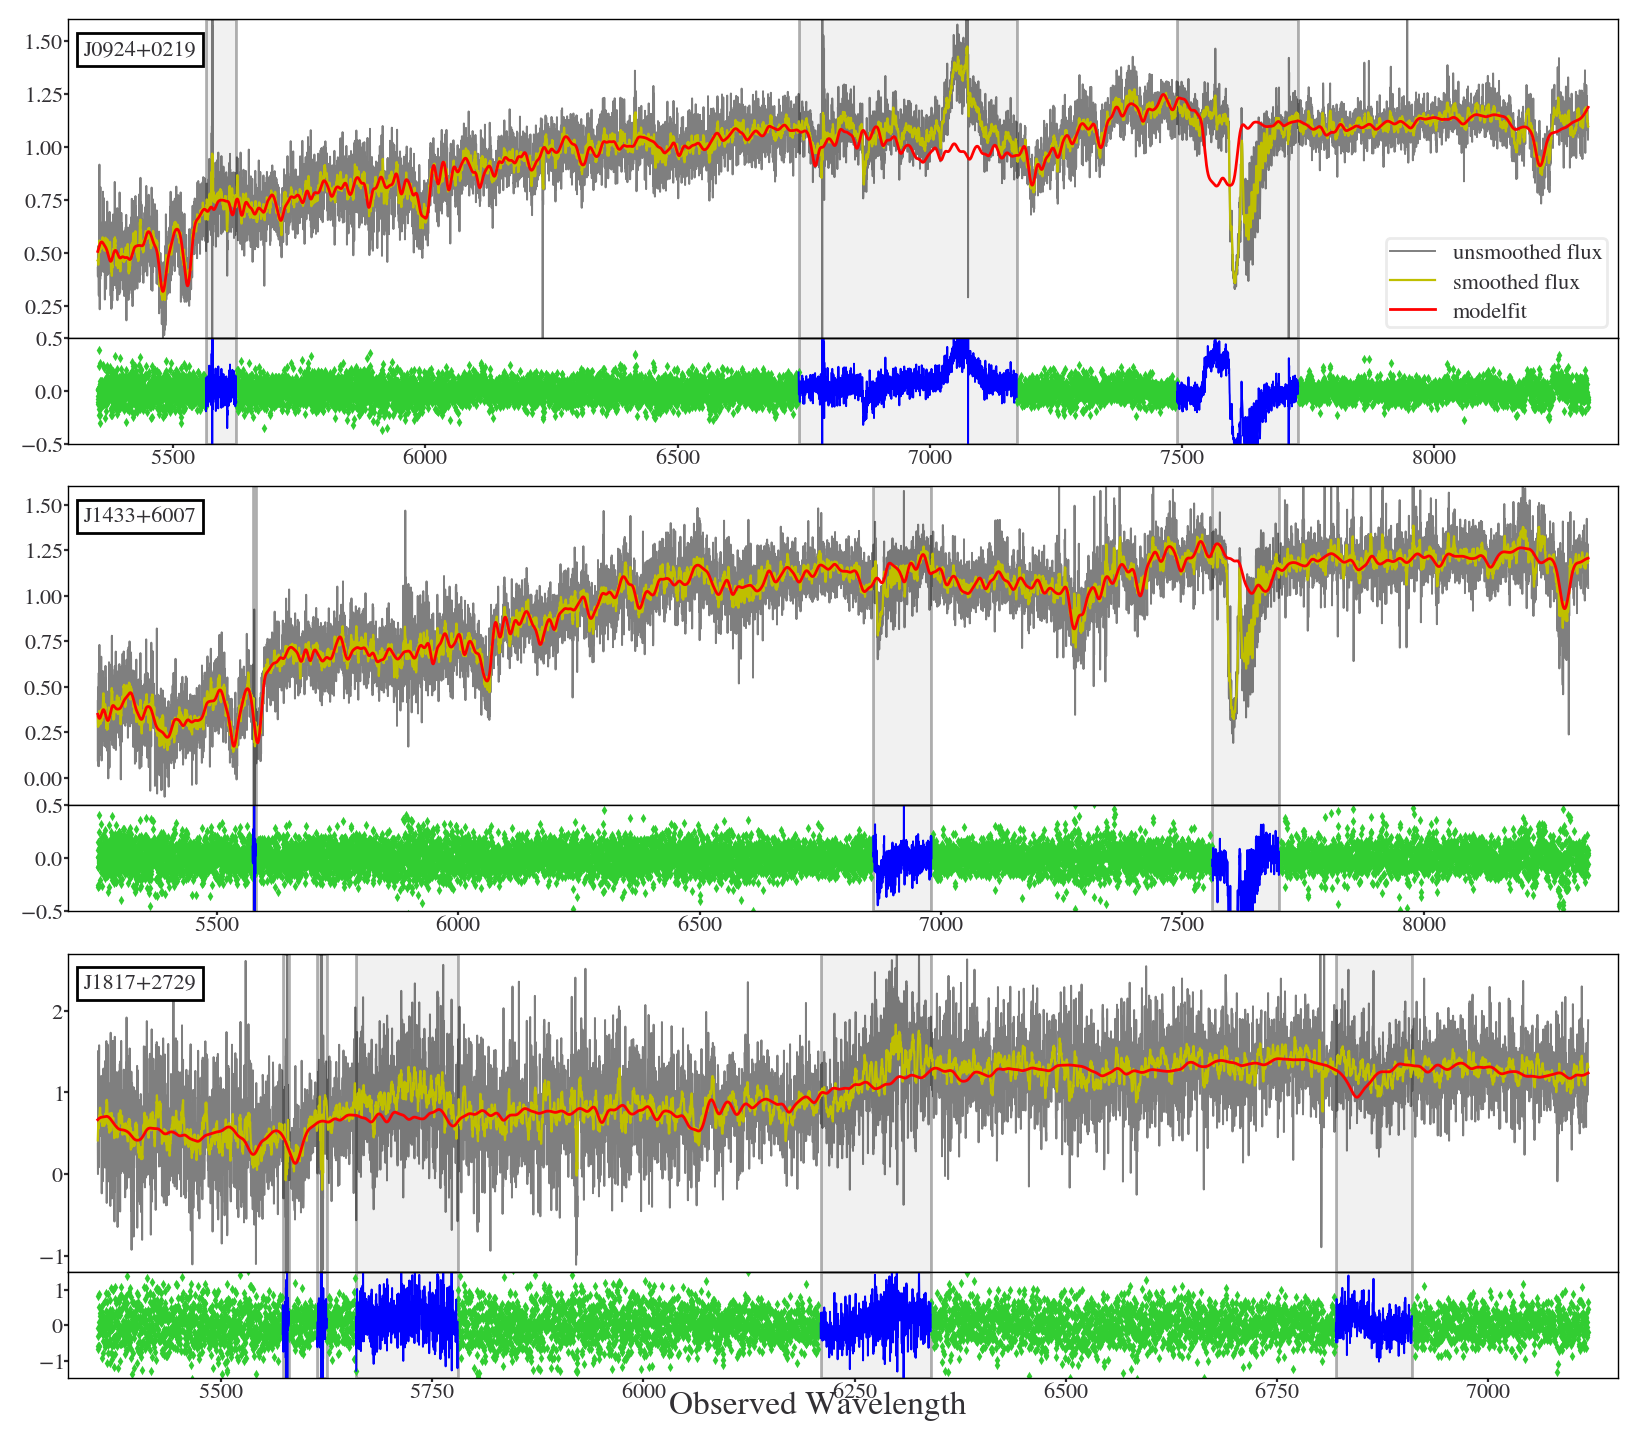

In [77]:
fg = plt.figure(figsize=(10, 9))
rows = 3
columns = 1
gs = gridspec.GridSpec(rows, columns, figure=fg)

for i, sp in enumerate(lens_sys[4:]):
    row = i
    i = i+4
    gs_sub = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[row, 0],
                                       hspace=0, height_ratios=[3, 1])
    ax1 = fg.add_subplot(gs_sub[0, 0])
    ax2 = fg.add_subplot(gs_sub[1, 0])
    
    
    sp.cal_parm(z=lens_z[i], high_z=True, logscale=True, veldis_start=vl_st[i],
                    noise_scale=ns_scale[i], doplot=False)
    fit_data = np.loadtxt(bst_data[i])
    
    x = np.exp(sp.wav_rebinned)*(1.0 + lens_z[i])
    ll, rr = np.min(x), np.max(x)
    gal_rebinn = spec1d.Spec1d(wav=x, flux=sp.flux_rebinned, verbose=False)
    gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize[i], verbose=False)
    bst = fit_data[0] #spec.best_fit[0]
    goodpixels = np.trim_zeros(fit_data[1], 'b').astype('int')
    
    #plt.ylabel("Relative Flux", fontsize=16)
    ax1.plot(x, gal_rebinn['flux'], color='k', label='unsmoothed flux', alpha=0.5) #'unsmoothed flux'
    ax1.plot(x, gal_smooth, color='y', linewidth=.8, label='smoothed flux',) #, label='smoothed flux'
    ax1.plot(x, bst, 'r', linewidth=1, label='modelfit') #, label='modelfit'
    w = np.flatnonzero(np.diff(goodpixels) > 1)
    for wj in w:
        a, b = goodpixels[wj : wj + 2]
        #print(x[a], x[b])
        ax1.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.3)
        
    #plt.legend(labelcolor='k')
    ax1.set_ylim(ylim1_list[i][0], ylim1_list[i][1])
    ax1.set_xticklabels([])
    ax1.tick_params(axis='y', labelsize=8, length=1.5, pad=0.05)
    ax1.set_xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
    ax1.annotate(lens_name[i], (0.01, 0.89), xycoords='axes fraction',
                 fontsize=8, bbox=dict(boxstyle='square', fc='white'))
    if i==4:
        ax1.legend(loc='lower right', fontsize=8)
    
    resid = gal_rebinn['flux'] - bst
    ax2.plot(x[goodpixels], resid[goodpixels], 'd', color='LimeGreen',
          mec='LimeGreen', ms=1)
    for wj in w:
        a, b = goodpixels[wj : wj + 2]
        ax2.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.3)
        ax2.plot(x[a : b + 1], resid[a : b + 1], 'b')

    ax2.set_xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
    ax2.set_ylim(ylim2_list[i][0], ylim2_list[i][1])
    ax2.tick_params(axis='both', labelsize=8, length=1.5, pad=0.05)
    
    plt.subplots_adjust(hspace=0.1)

    
fg.text(0.5, 0.11, 'Observed Wavelength', ha='center', va='center', fontsize=12)
#fg.text(0.07, 0.5, 'Relative Flux', ha='center', va='center', rotation='vertical', fontsize=18)
plt.savefig('paper_plots/veldis_fit_2.pdf', format='pdf', dpi=400, bbox_inches='tight')

In [4]:
lens_sys = [B0445_spec, B0631_spec, J0147_spec, J0818_spec, J0924_spec, J1433_spec, J1817_spec]
lens_name = np.array(['B0445+123', 'B0631+519', 'J0147+4630', 'J0818-2613', 'J0924+0219',
                      'J1433+6007', 'J1817+2729'])
lens_z = np.array([0.558, 0.620, 0.678, 0.866, 0.393, 0.407, 0.408])
ns_scale = [0.2, 0.08, 0.08, 0.2, 0.07, 0.1, 0.01]
vl_st = [200, 250, 200, 250, 250, 200, 250]
boxsize = [3, 3, 11, 13, 11, 11, 13]
ylim1_list = [[0.1, 1.8], [0.15, 1.6], [0.35, 1.5], [-0.5, 2.6], [0.1, 1.6], [-0.15, 1.8], [-1.2, 2.7]]
ylim2_list = [[-0.5, .5], [-.35, .35], [-.45, .45], [-1.0, 1], [-0.4, 0.4], [-0.4, 0.4], [-1.5, 1.5]]

In [5]:
smoothing = [3, 3, 11, 13, 11, 11, 13]
exclude_line = [None, None, ['H-delta','Fe4531'], ['H-delta', 'atm B'], None, None,
                ['atm B', 'Mg B', 'atm A']]
ylim_list = [[-0.45, 1.7], [-0.7, 1.7], [0.02, 1.5], [-0.7, 2.0], [-0.3, 1.5], [-0.4, 1.4], [-0.8, 1.8]]
xtick_start = [6000, 6200, 6600, 7150, 5400, 5400, 5400]
alpha_list = [0.6, 0.6, 0.4, 0.4, 0.4, 0.4, 0.4]
#trim_offset = [[110, 400], [0, 0], [0, 0], [0, 0], [0, 0], [500, 0], [0, 2000]]

### experimental figure


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       5276.25
[Fe VII]      3761.40       5292.29
H-iota        3770.00       5304.39
H-theta       3797.00       5342.38
H-eta         3835.00       5395.85
CN bandhd     3883.00       5463.38
CaII K        3933.67       5534.67
CaII H        3968.47       5583.64
H-delta       4101.00       5770.11
G-band        4305.00       6057.14
H-gamma       4340.00       6106.38
Fe4383        4383.00       6166.88
Ca4455        4455.00       6268.19
Fe4531        4531.00       6375.12
H-beta        4861.00       6839.43
Mg I (b)      5176.00       7282.63
Na I (D)      5889.95       8287.16
Na I (D)      5895.92       8295.56


The wavelength is already red shifted once. Watch out!!!
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389945 km/s

Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       5399.68
CN bandhd    

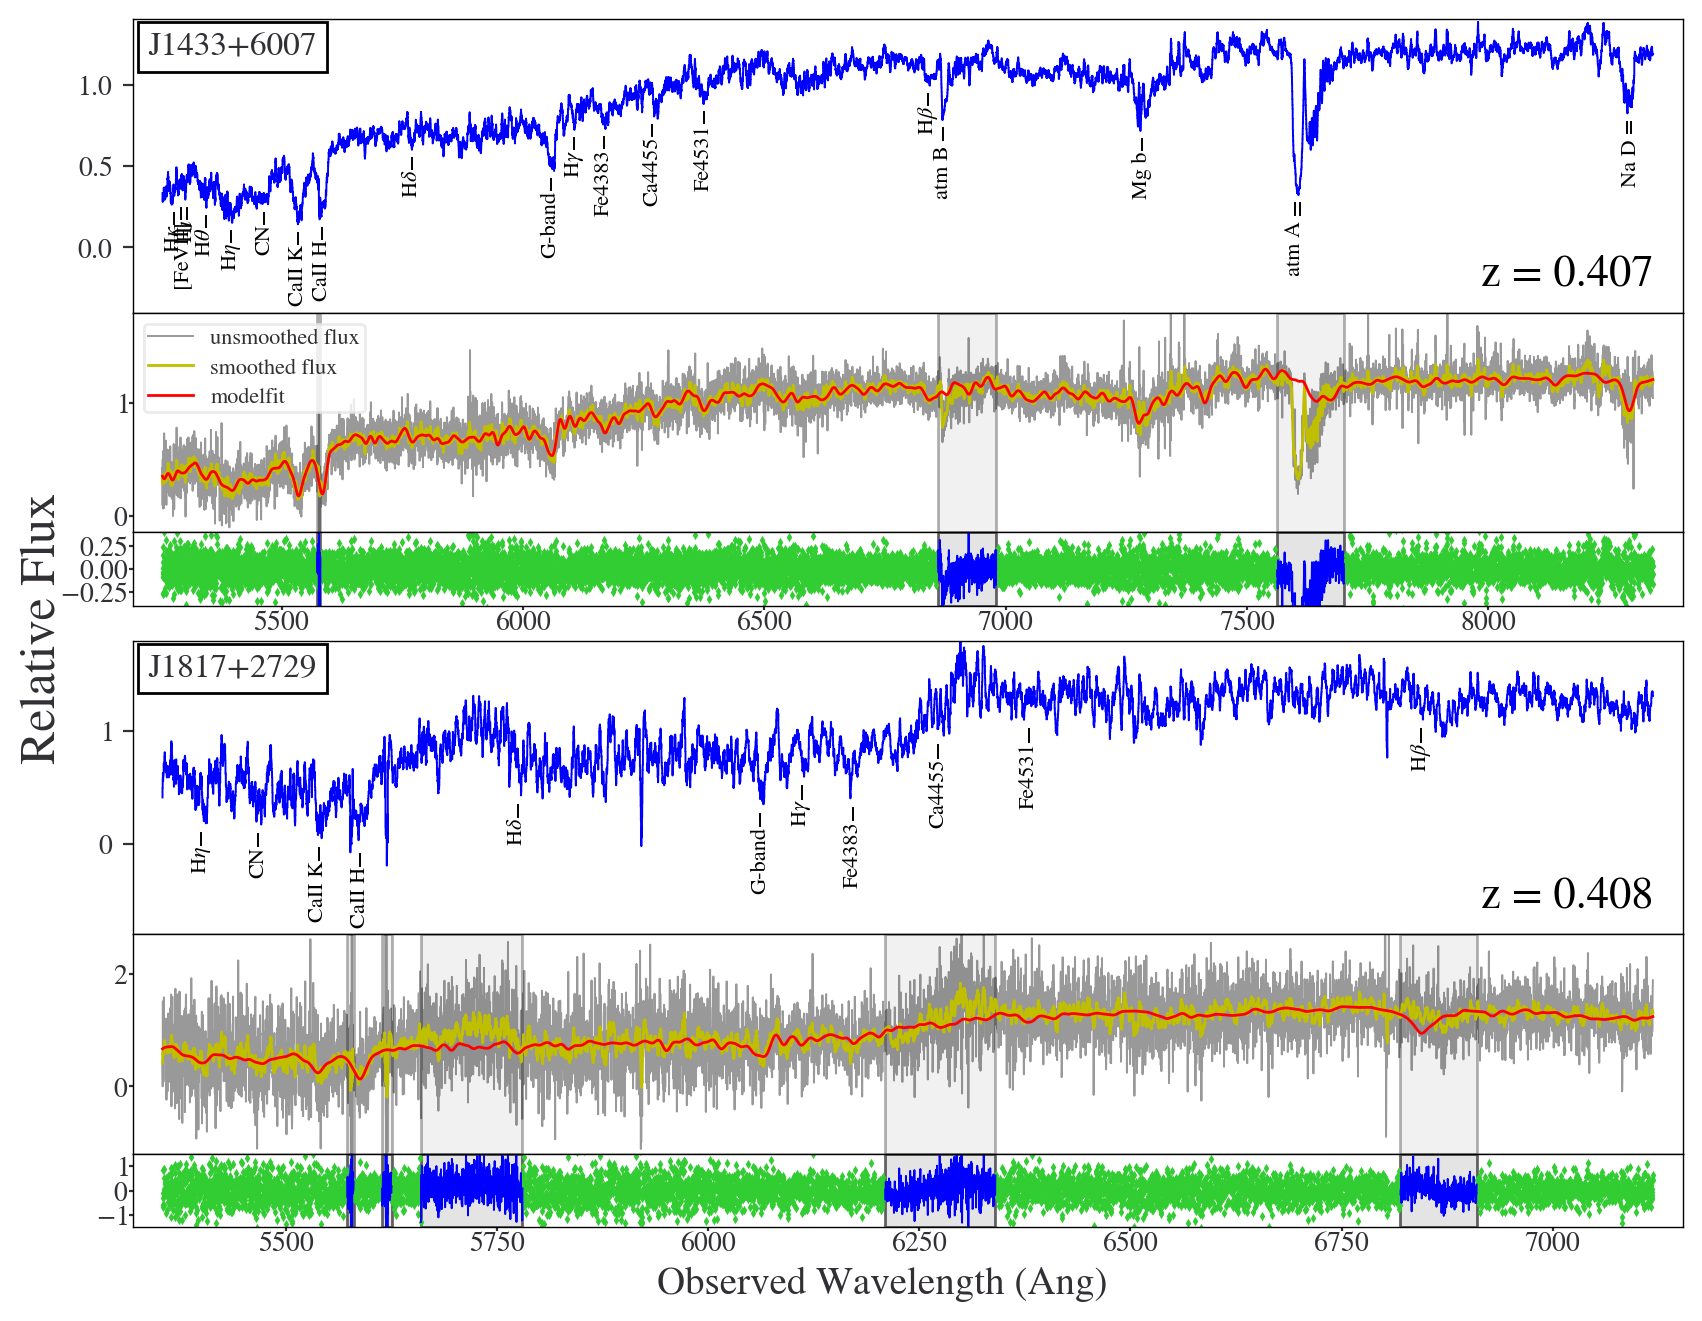

In [16]:
fg = plt.figure(figsize=(10, 8))
rows = 2
columns = 1
gs = gridspec.GridSpec(rows, columns, figure=fg)

for i, sp in enumerate(lens_sys[5:]):
    row = i
    i = i+5
    gs_sub = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[row, 0],
                                       hspace=0, height_ratios=[4, 3, 1])
    ax1 = fg.add_subplot(gs_sub[0, 0])
    
    #if i>1:
    norm=np.median(lens_sys[i]['flux'])
    spec =spec1d.Spec1d(wav=lens_sys[i]['wav'], flux=lens_sys[i]['flux']/norm, verbose=False)#, 
                    #trimsec=[trim_sp[i][0]+trim_offset[i][0], trim_sp[i][1]+trim_offset[i][1]])
    #else:
        #spec =spec1d.Spec1d(wav=lens_sys[i]['wav'], flux=lens_sys[i]['flux'], verbose=False)#,
                            #trimsec=[trim_sp[i][0]+trim_offset[i][0], trim_sp[i][1]+trim_offset[i][1]])
        
    spec.smooth(smoothing[i], showzero=False, label=lens_name[i], title=None, xlabel=None, fontsize=8,
               fig=fg, ax=ax1, ylabel=None)
    spec.mark_lines('abs', z=lens_z[i], usesmooth=True, excludeline=exclude_line[i], labfs=8)
    #print(lens_z[i])
    #ax1.legend(fontsize=12)
    #print(np.min(spec['wav']))
    ax1.annotate(lens_name[i], (0.01, 0.88), xycoords='axes fraction',
                fontsize=12, bbox=dict(boxstyle='square', fc='white'))
    ax1.set_ylim(ylim_list[i])
    ax1.set_xticks(np.arange(xtick_start[i], spec['wav'][-1], 300))
    #ax1.set_xticks([])
    ax1.tick_params(axis='both', labelsize=10)
    
    ax2 = fg.add_subplot(gs_sub[1, 0], sharex=ax1)
    ax3 = fg.add_subplot(gs_sub[2, 0])#, sharex=ax2)
    
    
    
    sp.cal_parm(z=lens_z[i], high_z=True, logscale=True, veldis_start=vl_st[i],
                    noise_scale=ns_scale[i], doplot=False)
    fit_data = np.loadtxt(bst_data[i])
    
    x = np.exp(sp.wav_rebinned)*(1.0 + lens_z[i])
    #print(np.min(np.exp(sp.wav_rebinned)), np.min(x))
    ll, rr = np.min(x), np.max(x)
    gal_rebinn = spec1d.Spec1d(wav=x, flux=sp.flux_rebinned, verbose=False)
    gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize[i], verbose=False)
    bst = fit_data[0] #spec.best_fit[0]
    goodpixels = np.trim_zeros(fit_data[1], 'b').astype('int')
    
    #plt.ylabel("Relative Flux", fontsize=16)
    ax2.plot(x, gal_rebinn['flux'], color='k', label='unsmoothed flux', alpha=alpha_list[i]) #'unsmoothed flux'
    ax2.plot(x, gal_smooth, color='y', linewidth=1.0, label='smoothed flux',) #, label='smoothed flux'
    ax2.plot(x, bst, 'r', linewidth=1, label='modelfit') #, label='modelfit'
    w = np.flatnonzero(np.diff(goodpixels) > 1)
    for wj in w:
        a, b = goodpixels[wj : wj + 2]
        #print(x[a], x[b])
        ax2.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.3)
        
    #plt.legend(labelcolor='k')
    ax2.set_ylim(ylim1_list[i][0], ylim1_list[i][1])
    ax2.set_xticklabels([])
    ax2.tick_params(axis='y', labelsize=10, length=1.5, pad=0.05)
    ax2.set_xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
    #ax2.annotate(lens_name[i], (0.01, 0.89), xycoords='axes fraction',
    #             fontsize=8, bbox=dict(boxstyle='square', fc='white'))
    if i==5:
        ax2.legend(loc='upper left', fontsize=8)
    
    resid = gal_rebinn['flux'] - bst
    ax3.plot(x[goodpixels], resid[goodpixels], 'd', color='LimeGreen',
          mec='LimeGreen', ms=1)
    for wj in w:
        a, b = goodpixels[wj : wj + 2]
        ax3.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.6)
        ax3.plot(x[a : b + 1], resid[a : b + 1], 'b')

    ax3.set_xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
    ax3.set_ylim(ylim2_list[i][0], ylim2_list[i][1])
    ax3.tick_params(axis='both', labelsize=10, length=1.5, pad=0.05)
    
    plt.subplots_adjust(hspace=0.06)

    
fg.text(0.5, 0.09, 'Observed Wavelength (Ang)', ha='center', va='center', fontsize=14)
fg.text(0.08, 0.5, 'Relative Flux', ha='center', va='center', rotation='vertical', fontsize=18)
plt.savefig('paper_plots/result_fig_3.pdf', format='pdf', dpi=400, bbox_inches='tight')


Line        lambda_rest  lambda_obs
----------  -----------  -----------
CaII K        3933.67       6600.70
CaII H        3968.47       6659.09
H-delta       4101.00       6881.48
G-band        4305.00       7223.79
H-gamma       4340.00       7282.52
Fe4383        4383.00       7354.67
Ca4455        4455.00       7475.49
Fe4531        4531.00       7603.02
H-beta        4861.00       8156.76


The wavelength is already red shifted once. Watch out!!!
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389931 km/s

Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       7156.11
CN bandhd     3883.00       7245.68
CaII K        3933.67       7340.23
CaII H        3968.47       7405.17
H-delta       4101.00       7652.47
G-band        4305.00       8033.13
H-gamma       4340.00       8098.44
Fe4383        4383.00       8178.68
Ca4455        4455.00       8313.03
Fe4531        4531.00       8454.85
H-beta       

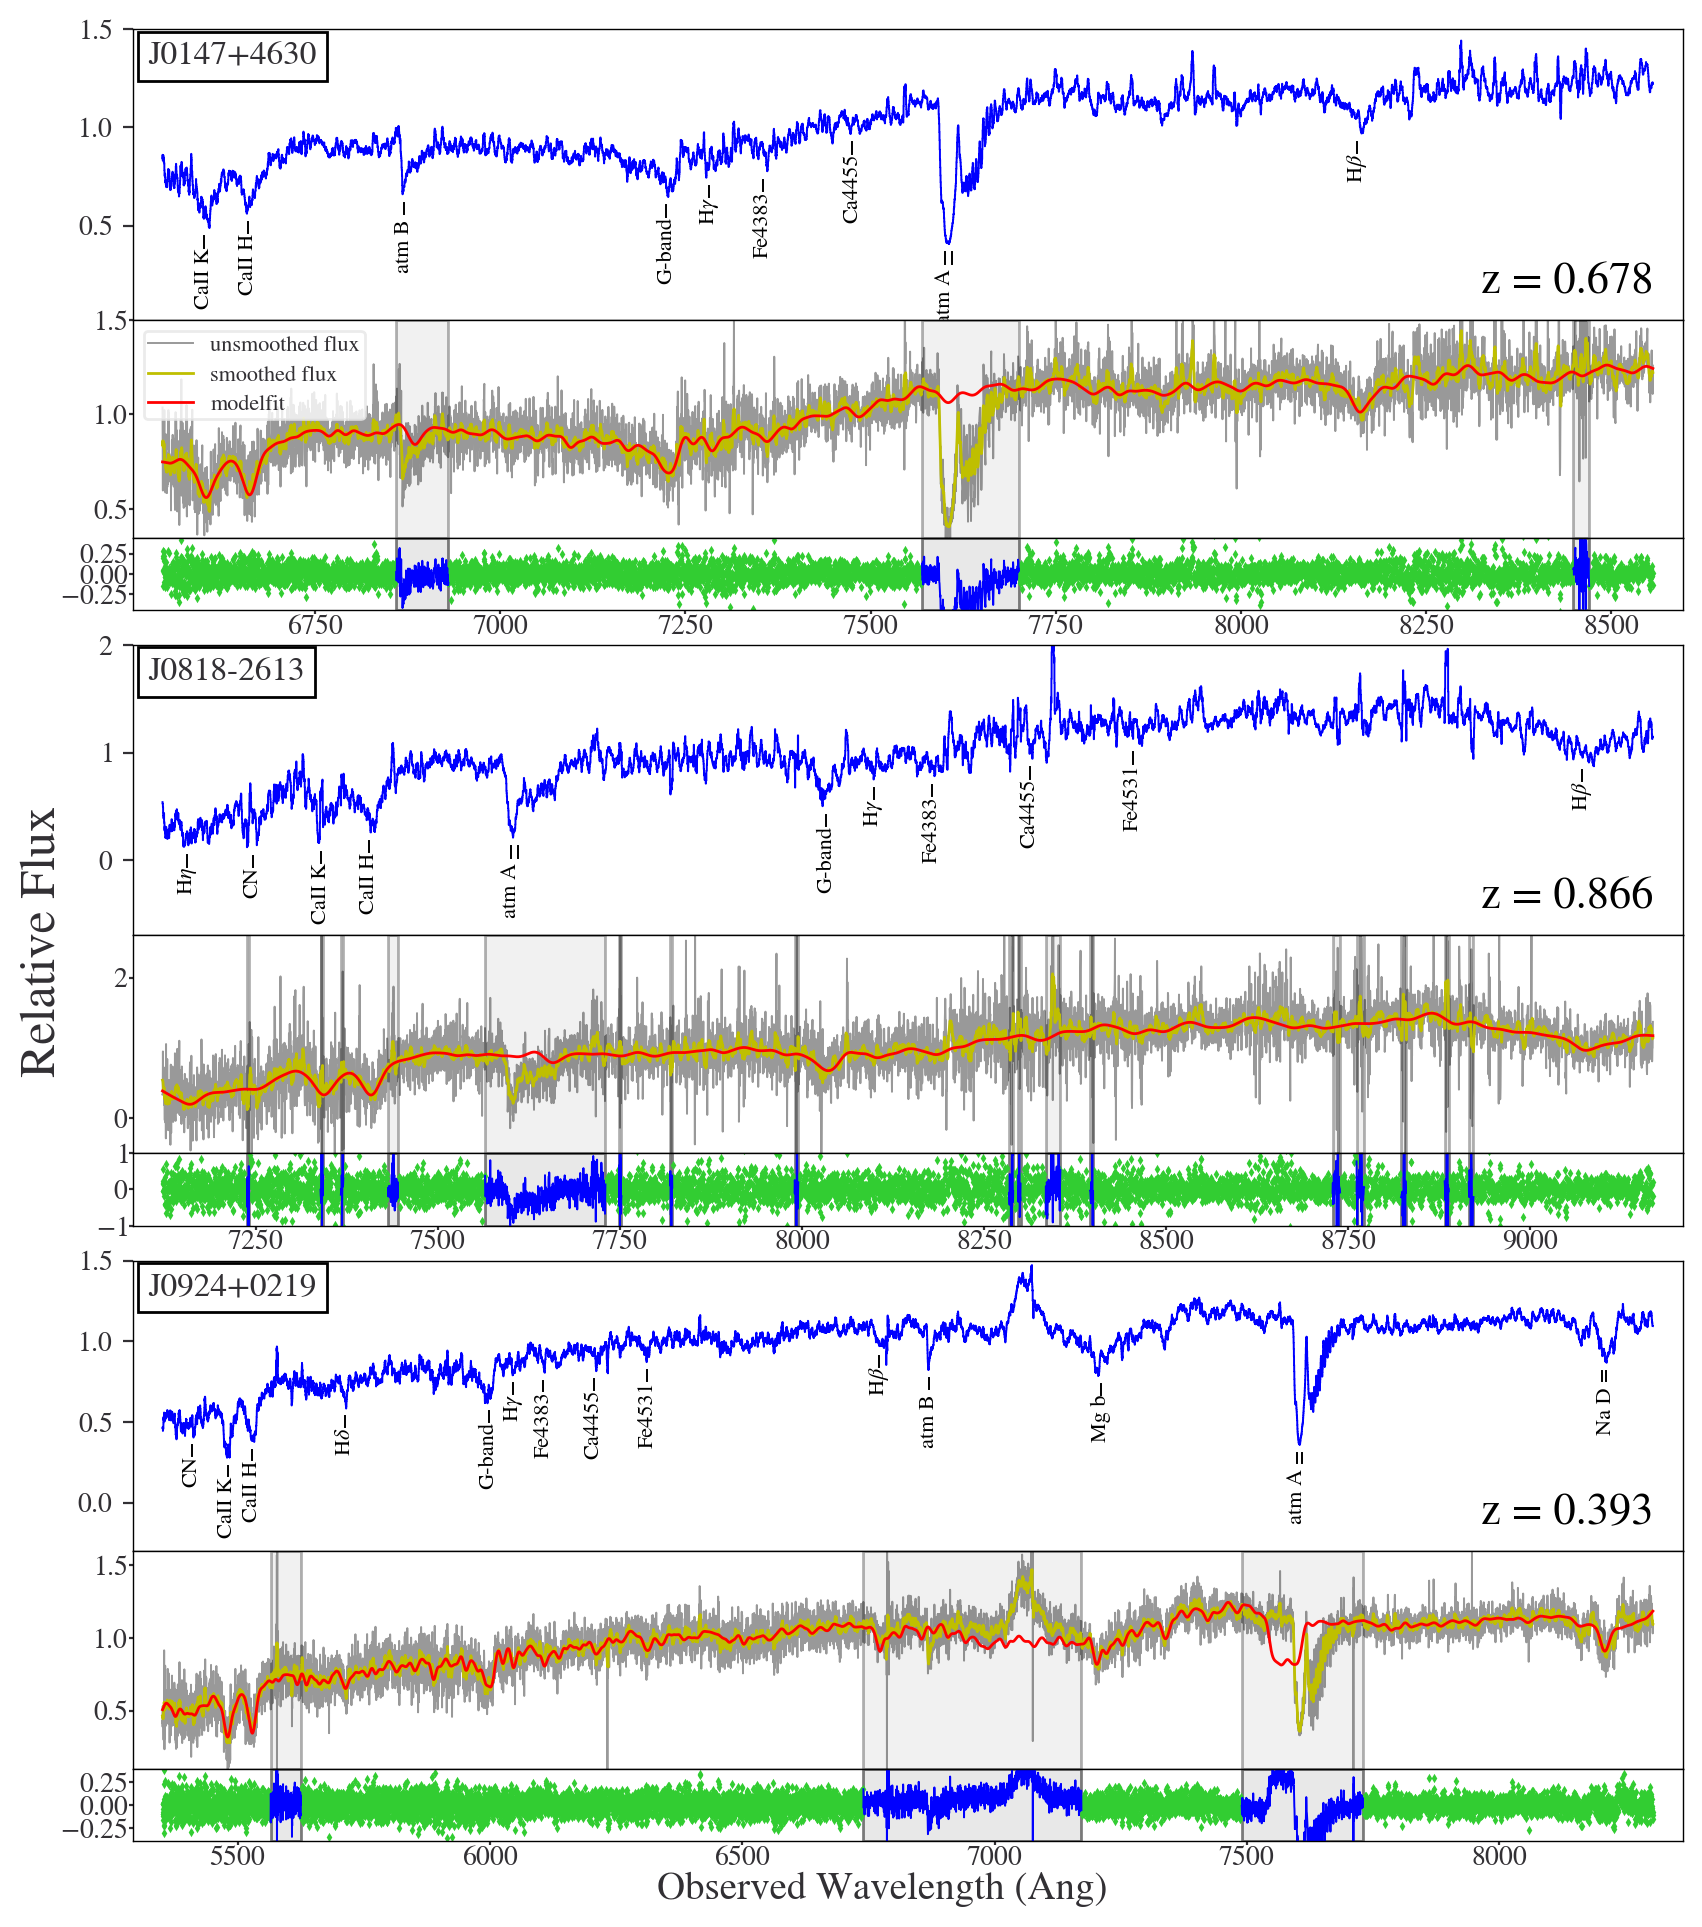

In [20]:
fg = plt.figure(figsize=(10, 12))
rows = 3
columns = 1
gs = gridspec.GridSpec(rows, columns, figure=fg)

for i, sp in enumerate(lens_sys[2:5]):
    row = i
    i = i+2
    gs_sub = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[row, 0],
                                       hspace=0, height_ratios=[4, 3, 1])
    ax1 = fg.add_subplot(gs_sub[0, 0])
    
    #if i>1:
    norm=np.median(lens_sys[i]['flux'])
    spec =spec1d.Spec1d(wav=lens_sys[i]['wav'], flux=lens_sys[i]['flux']/norm, verbose=False)#, 
                    #trimsec=[trim_sp[i][0]+trim_offset[i][0], trim_sp[i][1]+trim_offset[i][1]])
    #else:
        #spec =spec1d.Spec1d(wav=lens_sys[i]['wav'], flux=lens_sys[i]['flux'], verbose=False)#,
                            #trimsec=[trim_sp[i][0]+trim_offset[i][0], trim_sp[i][1]+trim_offset[i][1]])
        
    spec.smooth(smoothing[i], showzero=False, label=lens_name[i], title=None, xlabel=None, fontsize=8,
               fig=fg, ax=ax1, ylabel=None)
    spec.mark_lines('abs', z=lens_z[i], usesmooth=True, excludeline=exclude_line[i], labfs=8)
    #print(lens_z[i])
    #ax1.legend(fontsize=12)
    #print(np.min(spec['wav']))
    ax1.annotate(lens_name[i], (.01, 0.88), xycoords='axes fraction',
                fontsize=12, bbox=dict(boxstyle='square', fc='white'))
    ax1.set_ylim(ylim_list[i])
    ax1.set_xticks(np.arange(xtick_start[i], spec['wav'][-1], 300))
    #ax1.set_xticks([])
    ax1.tick_params(axis='both', labelsize=10)
    
    ax2 = fg.add_subplot(gs_sub[1, 0], sharex=ax1)
    ax3 = fg.add_subplot(gs_sub[2, 0])#, sharex=ax2)
    
    
    
    sp.cal_parm(z=lens_z[i], high_z=True, logscale=True, veldis_start=vl_st[i],
                    noise_scale=ns_scale[i], doplot=False)
    fit_data = np.loadtxt(bst_data[i])
    
    x = np.exp(sp.wav_rebinned)*(1.0 + lens_z[i])
    #print(np.min(np.exp(sp.wav_rebinned)), np.min(x))
    ll, rr = np.min(x), np.max(x)
    gal_rebinn = spec1d.Spec1d(wav=x, flux=sp.flux_rebinned, verbose=False)
    gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize[i], verbose=False)
    bst = fit_data[0] #spec.best_fit[0]
    goodpixels = np.trim_zeros(fit_data[1], 'b').astype('int')
    
    #plt.ylabel("Relative Flux", fontsize=16)
    ax2.plot(x, gal_rebinn['flux'], color='k', label='unsmoothed flux', alpha=alpha_list[i]) #'unsmoothed flux'
    ax2.plot(x, gal_smooth, color='y', linewidth=1.0, label='smoothed flux',) #, label='smoothed flux'
    ax2.plot(x, bst, 'r', linewidth=1, label='modelfit') #, label='modelfit'
    w = np.flatnonzero(np.diff(goodpixels) > 1)
    for wj in w:
        a, b = goodpixels[wj : wj + 2]
        #print(x[a], x[b])
        ax2.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.3)
        
    #plt.legend(labelcolor='k')
    ax2.set_ylim(ylim1_list[i][0], ylim1_list[i][1])
    ax2.set_xticklabels([])
    ax2.tick_params(axis='y', labelsize=10, length=1.5, pad=0.05)
    ax2.set_xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
    #ax2.annotate(lens_name[i], (0.01, 0.89), xycoords='axes fraction',
    #             fontsize=8, bbox=dict(boxstyle='square', fc='white'))
    if i==2:
        ax2.legend(loc='upper left', fontsize=8)
    
    resid = gal_rebinn['flux'] - bst
    ax3.plot(x[goodpixels], resid[goodpixels], 'd', color='LimeGreen',
          mec='LimeGreen', ms=1)
    for wj in w:
        a, b = goodpixels[wj : wj + 2]
        ax3.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.5)
        ax3.plot(x[a : b + 1], resid[a : b + 1], 'b')

    ax3.set_xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
    ax3.set_ylim(ylim2_list[i][0], ylim2_list[i][1])
    ax3.tick_params(axis='both', labelsize=10, length=1.5, pad=0.05)
    
    plt.subplots_adjust(hspace=0.06)

    
fg.text(0.5, 0.105, 'Observed Wavelength (Ang)', ha='center', va='center', fontsize=14)
fg.text(0.08, 0.5, 'Relative Flux', ha='center', va='center', rotation='vertical', fontsize=18)
plt.savefig('paper_plots/result_fig_2.pdf', format='pdf', dpi=400, bbox_inches='tight')


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       5842.50
[Fe VII]      3761.40       5860.26
H-iota        3770.00       5873.66
H-theta       3797.00       5915.73
H-eta         3835.00       5974.93
CN bandhd     3883.00       6049.71
CaII K        3933.67       6128.66
CaII H        3968.47       6182.88
H-delta       4101.00       6389.36
G-band        4305.00       6707.19
H-gamma       4340.00       6761.72
Fe4383        4383.00       6828.71
Ca4455        4455.00       6940.89
Fe4531        4531.00       7059.30
H-beta        4861.00       7573.44


The wavelength is already red shifted once. Watch out!!!
Velocity scale = 35.100309 km/s

Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       6212.70
CN bandhd     3883.00       6290.46
CaII K        3933.67       6372.55
CaII H        3968.47       6428.92
H-delta       4101.00       6643.62
G-band        4305.00       6974.10
H-gam

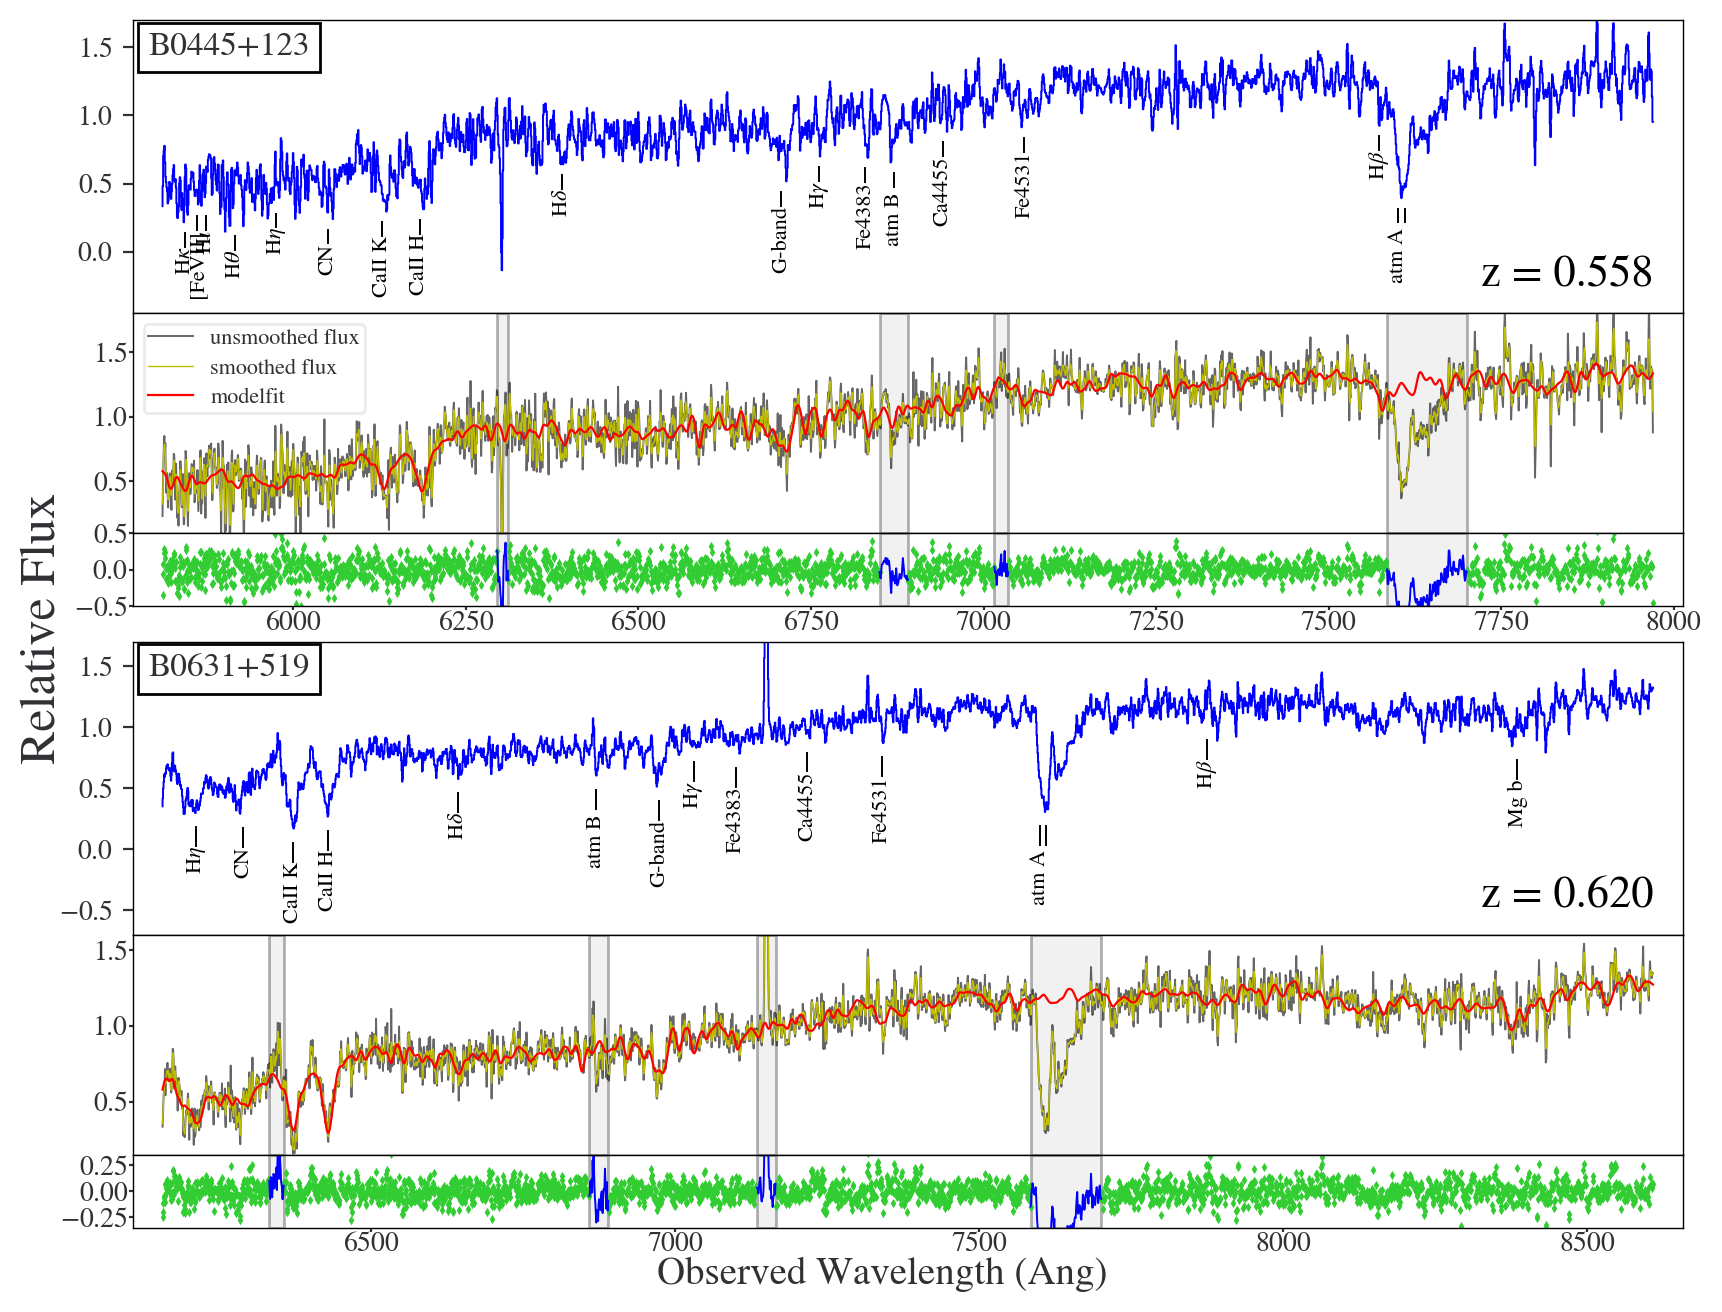

In [14]:
fg = plt.figure(figsize=(10, 8))
rows = 2
columns = 1
gs = gridspec.GridSpec(rows, columns, figure=fg)

for i, sp in enumerate(lens_sys[:2]):
    gs_sub = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[i, 0],
                                       hspace=0, height_ratios=[4, 3, 1])
    ax1 = fg.add_subplot(gs_sub[0, 0])
    
    #if i>1:
    norm=np.median(lens_sys[i]['flux'])
    spec =spec1d.Spec1d(wav=lens_sys[i]['wav'], flux=lens_sys[i]['flux']/norm, verbose=False)#, 
                    #trimsec=[trim_sp[i][0]+trim_offset[i][0], trim_sp[i][1]+trim_offset[i][1]])
    #else:
        #spec =spec1d.Spec1d(wav=lens_sys[i]['wav'], flux=lens_sys[i]['flux'], verbose=False)#,
                            #trimsec=[trim_sp[i][0]+trim_offset[i][0], trim_sp[i][1]+trim_offset[i][1]])
        
    spec.smooth(smoothing[i], showzero=False, label=lens_name[i], title=None, xlabel=None, fontsize=8,
               fig=fg, ax=ax1, ylabel=None)
    spec.mark_lines('abs', z=lens_z[i], usesmooth=True, excludeline=exclude_line[i], labfs=8)
    #print(lens_z[i])
    #ax1.legend(fontsize=12)
    ax1.annotate(lens_name[i], (.01, 0.88), xycoords='axes fraction',
                fontsize=12, bbox=dict(boxstyle='square', fc='white'))
    ax1.set_ylim(ylim_list[i])
    ax1.set_xticks(np.arange(xtick_start[i], spec['wav'][-1], 300))
    #ax1.set_xticks([])
    ax1.tick_params(axis='both', labelsize=10)
    
    ax2 = fg.add_subplot(gs_sub[1, 0], sharex=ax1)
    ax3 = fg.add_subplot(gs_sub[2, 0])#, sharex=ax2)
    
    if i < 2:
        sp.cal_parm(z=lens_z[i], high_z=True, logscale=False, veldis_start=vl_st[i],
                    noise_scale=ns_scale[i], doplot=False)
    else:
        sp.cal_parm(z=lens_z[i], high_z=True, logscale=True, veldis_start=vl_st[i],
                    noise_scale=ns_scale[i], doplot=False)
    fit_data = np.loadtxt(bst_data[i])
    
    x = np.exp(sp.wav_rebinned)*(1.0 + lens_z[i])
    ll, rr = np.min(x), np.max(x)
    gal_rebinn = spec1d.Spec1d(wav=x, flux=sp.flux_rebinned, verbose=False)
    gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize[i], verbose=False)
    bst = fit_data[0] #spec.best_fit[0]
    goodpixels = np.trim_zeros(fit_data[1], 'b').astype('int')
    
    #plt.ylabel("Relative Flux", fontsize=16)
    ax2.plot(x, gal_rebinn['flux'], color='k', label='unsmoothed flux', alpha=alpha_list[i]) #'unsmoothed flux'
    ax2.plot(x, gal_smooth, color='y', linewidth=.5, label='smoothed flux',) #, label='smoothed flux'
    ax2.plot(x, bst, 'r', linewidth=0.8, label='modelfit') #, label='modelfit'
    w = np.flatnonzero(np.diff(goodpixels) > 1)
    for wj in w:
        a, b = goodpixels[wj : wj + 2]
        #print(x[a], x[b])
        ax2.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.3)
        
    #plt.legend(labelcolor='k')
    ax2.set_ylim(ylim1_list[i][0], ylim1_list[i][1])
    ax2.set_xticklabels([])
    ax2.tick_params(axis='y', labelsize=10, length=1.5, pad=0.05)
    ax2.set_xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
    #ax2.annotate(lens_name[i], (0.01, 0.89), xycoords='axes fraction',
    #             fontsize=8, bbox=dict(boxstyle='square', fc='white'))
    if i==0:
        ax2.legend(loc='upper left', fontsize=8)
    
    resid = gal_rebinn['flux'] - bst
    ax3.plot(x[goodpixels], resid[goodpixels], 'd', color='LimeGreen',
          mec='LimeGreen', ms=1)
    for wj in w:
        a, b = goodpixels[wj : wj + 2]
        ax3.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.3)
        ax3.plot(x[a : b + 1], resid[a : b + 1], 'b')

    ax3.set_xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
    ax3.set_ylim(ylim2_list[i][0], ylim2_list[i][1])
    ax3.tick_params(axis='both', labelsize=10, length=1.5, pad=0.05)
    
    plt.subplots_adjust(hspace=0.06)

    
fg.text(0.5, 0.096, 'Observed Wavelength (Ang)', ha='center', va='center', fontsize=14)
fg.text(0.08, 0.5, 'Relative Flux', ha='center', va='center', rotation='vertical', fontsize=18)
plt.savefig('paper_plots/result_fig_1.pdf', format='pdf', dpi=400, bbox_inches='tight')

In [121]:
## B0445 veldis plot
spec = Veldis('../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits', 
              informat='fits', trimsec=[200, 2900])


Reading spectrum from ../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  5810.46
 Spectrum End:     7969.83
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



In [122]:
spec.cal_parm(z=0.558, high_z=True, logscale=False, veldis_start=200, noise_scale=0.12, doplot=False)


The wavelength is red shifted.
Velocity scale = 35.100309 km/s


In [123]:
fit_data = np.loadtxt('../velocity_dispersion/B0445_bestfit_veldis.txt')

6094.700924077325 6110.41991867357
6209.949830761812 6225.237160616133
6294.865696781026 6311.100941316306
6849.327515049698 6890.348455857358
7015.712596258928 7035.4542525746265
7584.668603085531 7700.093736473112


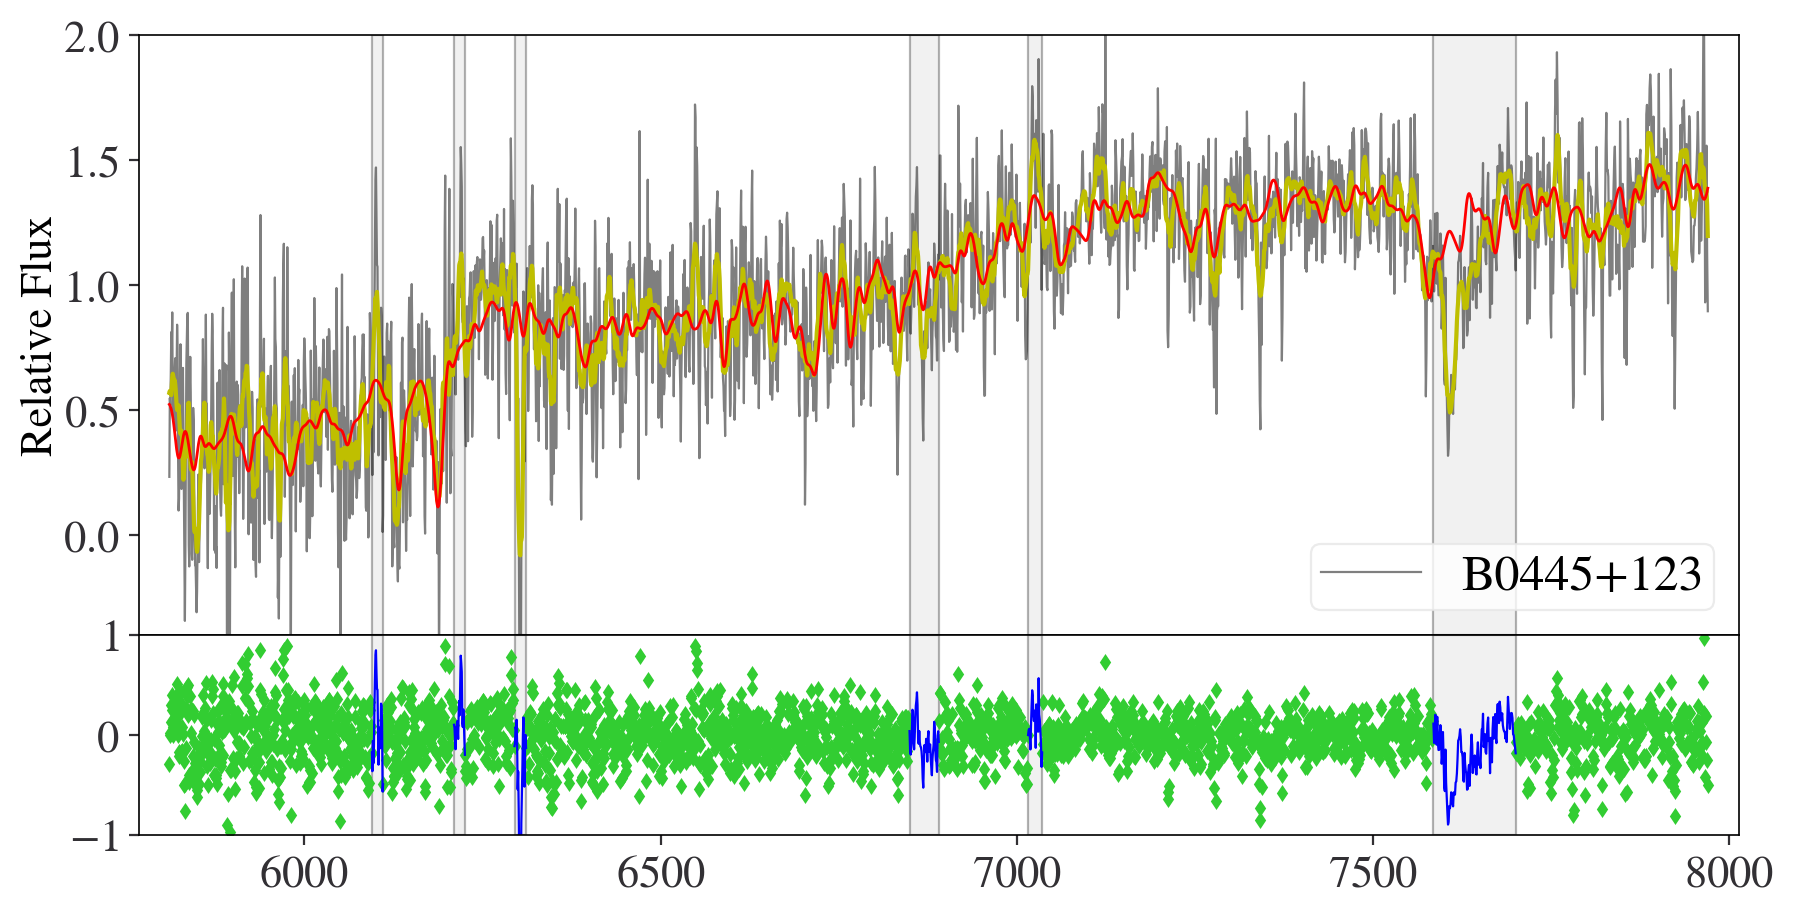

In [127]:
fig = plt.figure()
frame1=fig.add_axes((.1,.3,.8,.6))
boxsize=11
x = np.exp(spec.wav_rebinned)*1.558
ll, rr = np.min(x), np.max(x)
gal_rebinn = spec1d.Spec1d(wav=x, flux=spec.flux_rebinned, verbose=False)
gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize, verbose=False)
bst = fit_data[0] #spec.best_fit[0]
goodpixels = np.trim_zeros(fit_data[1], 'b').astype('int')#spec.goodpixels[0]
#plt.xlabel(r"Wavelength (Ang)", fontsize=16)
plt.ylabel("Relative Flux", fontsize=16)
plt.plot(x, gal_rebinn['flux'], color='k', label=lens_name[0], alpha=0.5) #'unsmoothed flux'
plt.plot(x, gal_smooth, color='y', linewidth=1.5) #, label='smoothed flux'
plt.plot(x, bst, 'r', linewidth=1) #, label='modelfit'
w = np.flatnonzero(np.diff(goodpixels) > 1)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    print(x[a], x[b])
    plt.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.3)
    #plt.plot(x[a : b + 1], resid[a : b + 1], 'b')
    
# If the span is two thin than the function doesn't plot it visbly. So increased the span manually.
#plt.axvspan(5570, 5580, facecolor='lightgray')
plt.legend(labelcolor='k')
plt.ylim(-0.4, 2.0)
frame1.set_xticklabels([])
plt.xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
#plt.xlim(ll, rr)
#plt.xticks(np.arange(5780, x[-1]+30, 250))

frame2=fig.add_axes((.1,.1,.8,.2))
resid = gal_rebinn['flux'] - bst
plt.plot(x[goodpixels], resid[goodpixels], 'd', color='LimeGreen',
          mec='LimeGreen', ms=3)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    plt.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.3)
    plt.plot(x[a : b + 1], resid[a : b + 1], 'b')

plt.xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
plt.ylim(-1, 1.0)
#plt.xlabel(r"Wavelength (Ang)", fontsize=16)
plt.savefig('paper_plots/B0445_veldis.pdf', format='pdf', dpi=200, bbox_inches='tight')

In [116]:
## B0631 veldis plot
spec = Veldis(wav=B0631_spec['wav'], flux=B0631_spec['flux'], var=B0631_spec['var'],
             trimsec=trim_sp[1])

 Spectrum Start:  6157.39
 Spectrum End:     8608.76
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



In [117]:
spec.cal_parm(z=0.620, high_z=True, logscale=False, veldis_start=250, noise_scale=0.08, doplot=False)


The wavelength is red shifted.
Velocity scale = 32.790286 km/s


In [118]:
fit_data = np.loadtxt('../velocity_dispersion/B0631_LRIS_bestfit_veldis.txt')

6332.859276085376 6356.453790359381
6859.991121750792 6890.069778154632
7134.715348051042 7165.214824029415
7584.554577128609 7700.746232034833


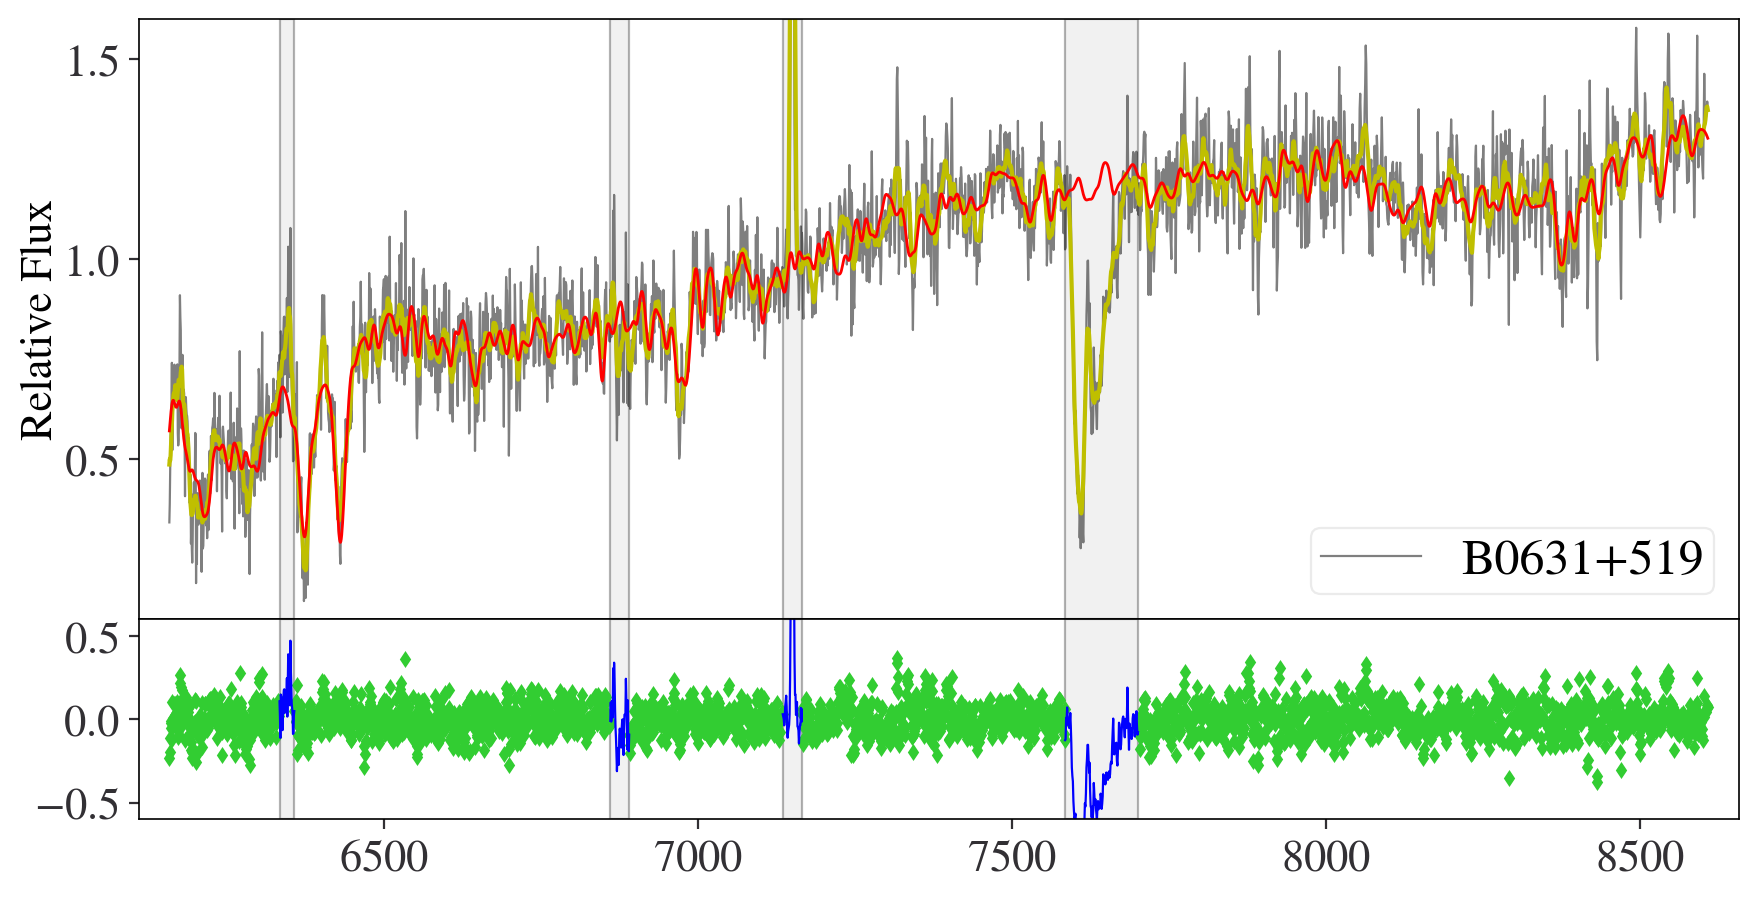

In [120]:
fig = plt.figure()
frame1=fig.add_axes((.1,.3,.8,.6))
boxsize=11
x = np.exp(spec.wav_rebinned)*(1.0 + lens_z[1])
ll, rr = np.min(x), np.max(x)
gal_rebinn = spec1d.Spec1d(wav=x, flux=spec.flux_rebinned, verbose=False)
gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize, verbose=False)
bst = fit_data[0] #spec.best_fit[0]
goodpixels = np.trim_zeros(fit_data[1], 'b').astype('int')#spec.goodpixels[0]
#plt.xlabel(r"Wavelength (Ang)", fontsize=16)
plt.ylabel("Relative Flux", fontsize=16)
plt.plot(x, gal_rebinn['flux'], color='k', label=lens_name[1], alpha=0.5) #'unsmoothed flux'
plt.plot(x, gal_smooth, color='y', linewidth=1.5) #, label='smoothed flux'
plt.plot(x, bst, 'r', linewidth=1) #, label='modelfit'
w = np.flatnonzero(np.diff(goodpixels) > 1)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    print(x[a], x[b])
    plt.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.3)
    #plt.plot(x[a : b + 1], resid[a : b + 1], 'b')
    
# If the span is two thin than the function doesn't plot it visbly. So increased the span manually.
#plt.axvspan(5570, 5580, facecolor='lightgray')
plt.legend(labelcolor='k', loc =4)
plt.ylim(0.1, 1.6)
frame1.set_xticklabels([])
plt.xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
#plt.xlim(ll, rr)
#plt.xticks(np.arange(5780, x[-1]+30, 250))

frame2=fig.add_axes((.1,.1,.8,.2))
resid = gal_rebinn['flux'] - bst
plt.plot(x[goodpixels], resid[goodpixels], 'd', color='LimeGreen',
          mec='LimeGreen', ms=3)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    plt.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.3)
    plt.plot(x[a : b + 1], resid[a : b + 1], 'b')

plt.xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
plt.ylim(-.6, .6)
#plt.xlabel(r"Wavelength (Ang)", fontsize=16)
plt.savefig('paper_plots/B0631_veldis.pdf', format='pdf', dpi=200, bbox_inches='tight')

In [13]:
## J0147 veldis plot
spec = Veldis(wav=J0147_spec['wav'], flux=J0147_spec['flux'], var=J0147_spec['var'],
             trimsec=trim_sp[2])

 Spectrum Start:  6544.12
 Spectrum End:     8556.09
 Dispersion (1st pixel):   0.25
 Dispersion (average):      0.29



In [14]:
spec.cal_parm(z=lens_z[2], high_z=True, logscale=True, veldis_start=250, noise_scale=0.01, doplot=False)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389931 km/s


In [15]:
fit_data = np.loadtxt('../velocity_dispersion/J0147_bestfit_veldis.txt')

6859.800728568582 6930.004234797648
7569.714501400011 7700.24423028545
8448.84805925884 8470.06025774523


(-0.6, 0.6)

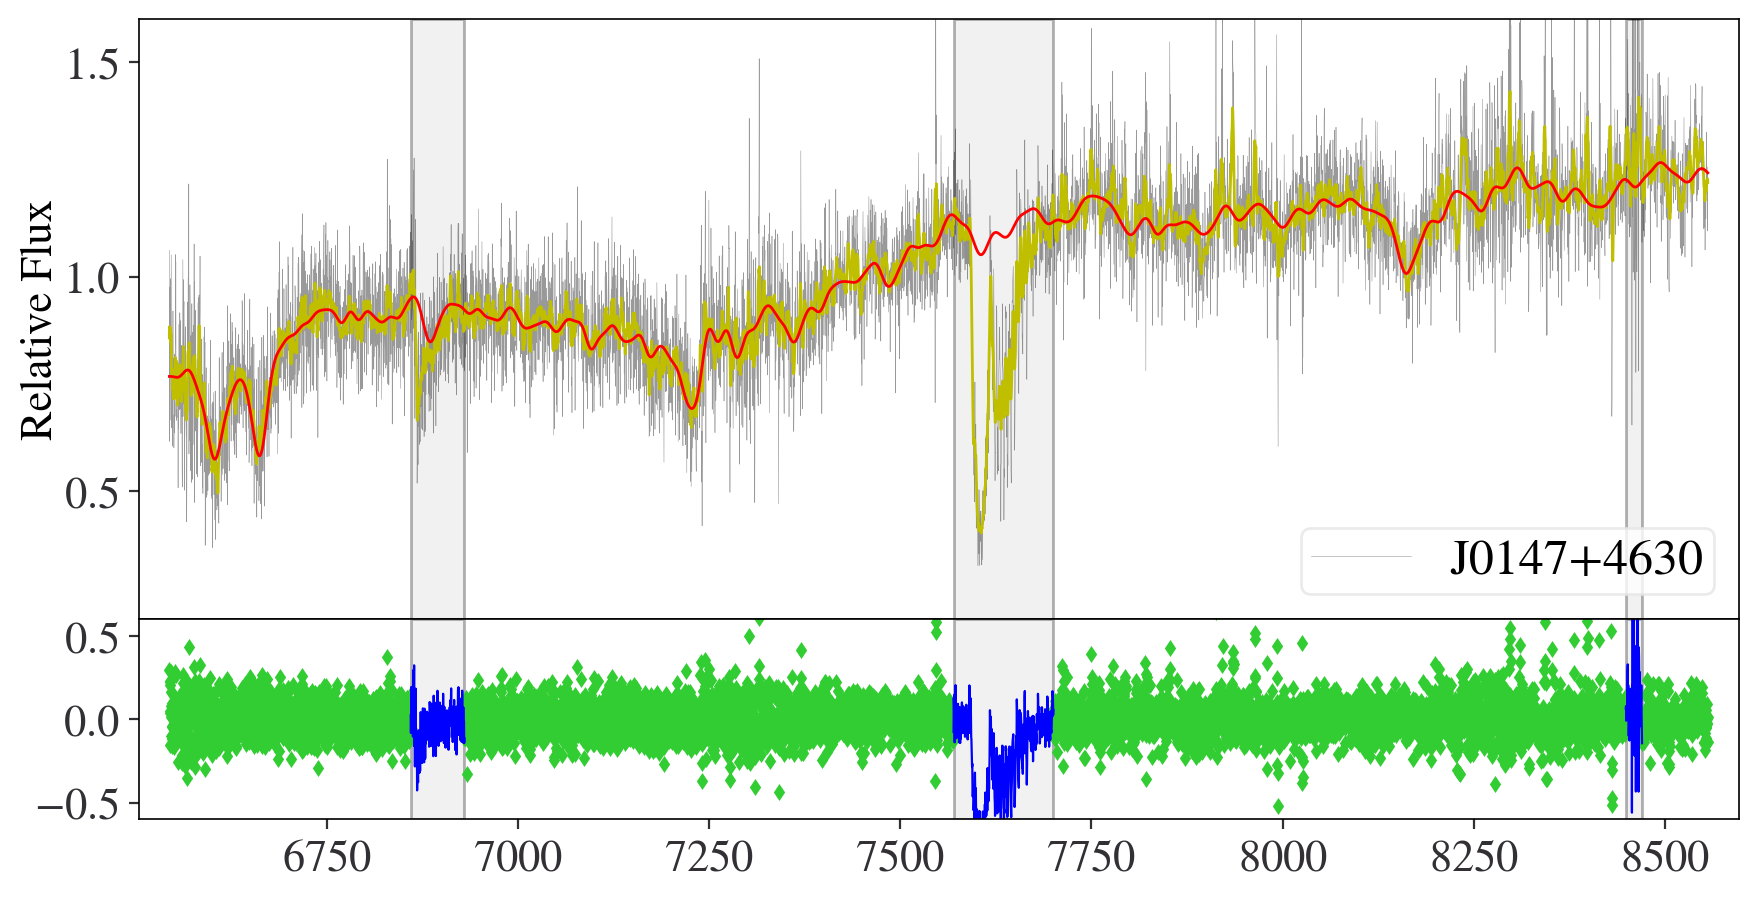

In [16]:
fig = plt.figure()
frame1=fig.add_axes((.1,.3,.8,.6))
boxsize=11
x = np.exp(spec.wav_rebinned)*(1.0 + lens_z[2])
ll, rr = np.min(x), np.max(x)
gal_rebinn = spec1d.Spec1d(wav=x, flux=spec.flux_rebinned, verbose=False)
gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize, verbose=False)
bst = fit_data[0] #spec.best_fit[0]
goodpixels = np.trim_zeros(fit_data[1], 'b').astype('int')#spec.goodpixels[0]
#plt.xlabel(r"Wavelength (Ang)", fontsize=16)
plt.ylabel("Relative Flux", fontsize=16)
plt.plot(x, gal_rebinn['flux'], color='k', linewidth=0.2, label=lens_name[2], alpha=0.4) #'unsmoothed flux'
plt.plot(x, gal_smooth, color='y', linewidth=1) #, label='smoothed flux'
plt.plot(x, bst, 'r', linewidth=1) #, label='modelfit'
w = np.flatnonzero(np.diff(goodpixels) > 1)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    print(x[a], x[b])
    plt.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.3)
    #plt.plot(x[a : b + 1], resid[a : b + 1], 'b')
    
# If the span is two thin than the function doesn't plot it visbly. So increased the span manually.
#plt.axvspan(5570, 5580, facecolor='lightgray')
plt.legend(labelcolor='k', loc=4)
plt.ylim(0.2, 1.6)
frame1.set_xticklabels([])
plt.xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
#plt.xlim(ll, rr)
#plt.xticks(np.arange(5780, x[-1]+30, 250))

frame2=fig.add_axes((.1,.1,.8,.2))
resid = gal_rebinn['flux'] - bst
plt.plot(x[goodpixels], resid[goodpixels], 'd', color='LimeGreen',
          mec='LimeGreen', ms=3)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    plt.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.3)
    plt.plot(x[a : b + 1], resid[a : b + 1], 'b')

plt.xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
plt.ylim(-.6, .6)
#plt.xlabel(r"Wavelength (Ang)", fontsize=16)
#plt.savefig('paper_plots/J0147_veldis.pdf', format='pdf', dpi=200, bbox_inches='tight')

In [17]:
## J0818 veldis plot
spec = Veldis(wav=J0818_spec['wav'], flux=J0818_spec['flux'], var=J0818_spec['var'],
             trimsec=trim_sp[3])

 Spectrum Start:  7121.92
 Spectrum End:     9168.65
 Dispersion (1st pixel):   0.27
 Dispersion (average):      0.31



In [18]:
spec.cal_parm(z=lens_z[3], high_z=True, logscale=True, veldis_start=250, noise_scale=0.01, doplot=False)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389929 km/s


In [19]:
fit_data = np.loadtxt('../velocity_dispersion/J0818_bestfit_veldis_new.txt')

(-1.0, 1.0)

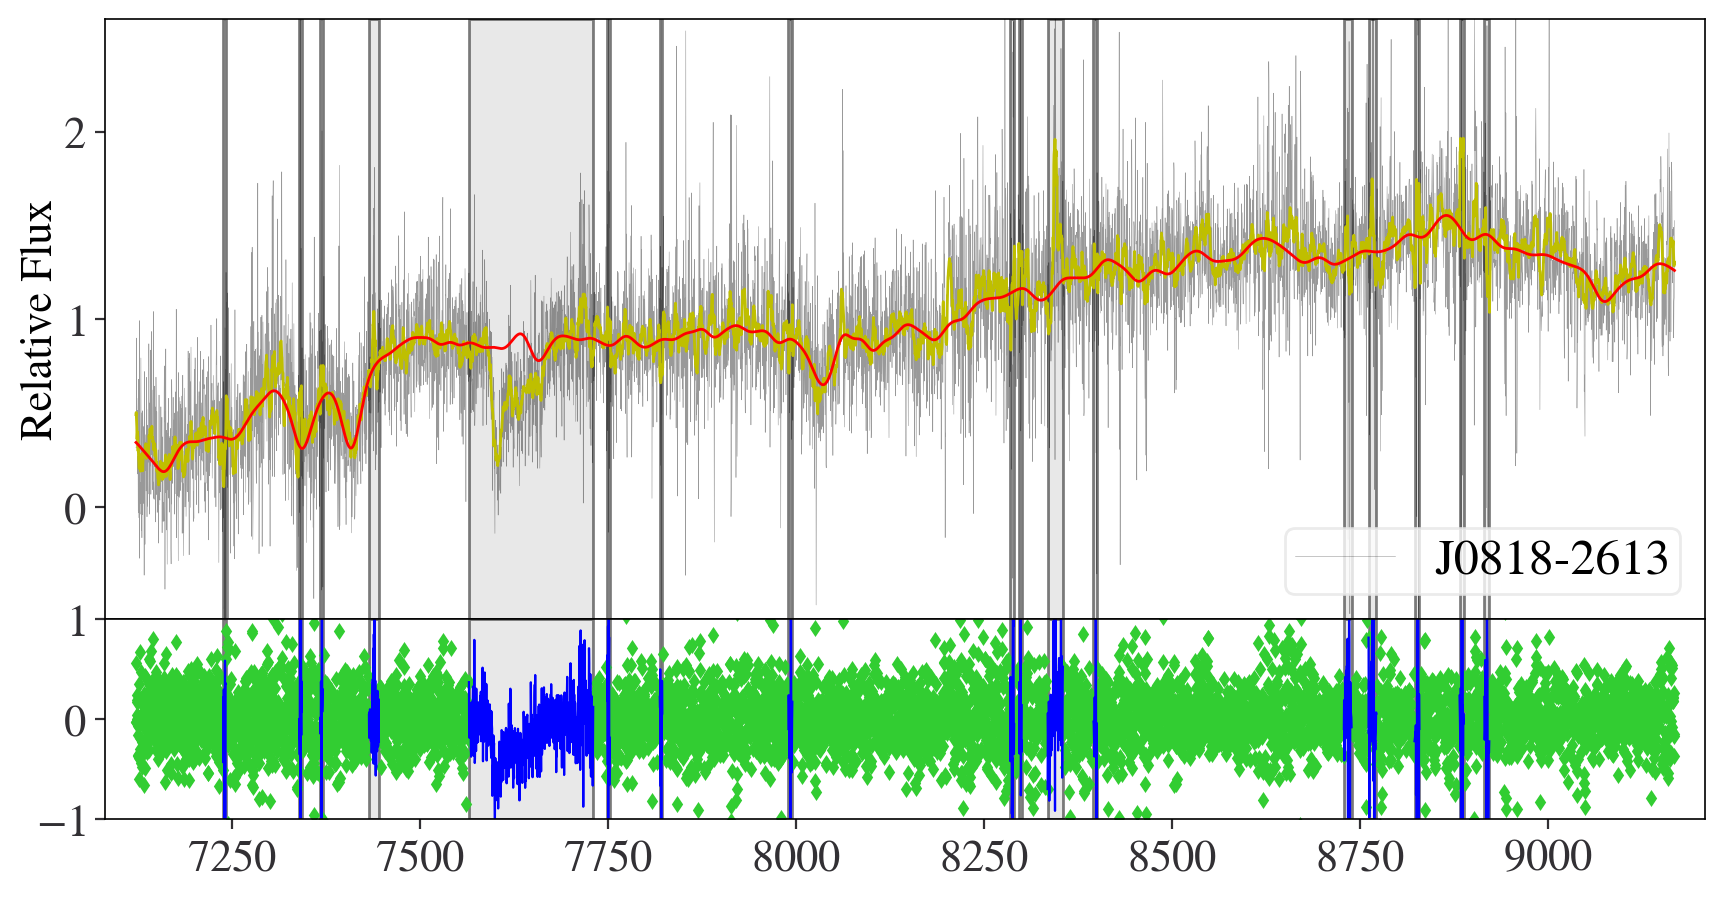

In [20]:
fig = plt.figure()
frame1=fig.add_axes((.1,.3,.8,.6))
boxsize=15
x = np.exp(spec.wav_rebinned)*(1.0 + lens_z[3])
ll, rr = np.min(x), np.max(x)
gal_rebinn = spec1d.Spec1d(wav=x, flux=spec.flux_rebinned, verbose=False)
gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize, verbose=False)
bst = fit_data[0] #spec.best_fit[0]
goodpixels = np.trim_zeros(fit_data[1], 'b').astype('int')#spec.goodpixels[0]
#plt.xlabel(r"Wavelength (Ang)", fontsize=16)
plt.ylabel("Relative Flux", fontsize=16)
plt.plot(x, gal_rebinn['flux'], color='k', linewidth=0.2, label=lens_name[3], alpha=0.4) #'unsmoothed flux'
plt.plot(x, gal_smooth, color='y', linewidth=1) #, label='smoothed flux'
plt.plot(x, bst, 'r', linewidth=1) #, label='modelfit'
w = np.flatnonzero(np.diff(goodpixels) > 1)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    #print(x[a], x[b])
    plt.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.5)
    #plt.plot(x[a : b + 1], resid[a : b + 1], 'b')
    
# If the span is two thin than the function doesn't plot it visbly. So increased the span manually.
#plt.axvspan(5570, 5580, facecolor='lightgray')
plt.legend(labelcolor='k', loc=4)
plt.ylim(-0.6, 2.6)
frame1.set_xticklabels([])
plt.xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
#plt.xlim(ll, rr)
#plt.xticks(np.arange(5780, x[-1]+30, 250))

frame2=fig.add_axes((.1,.1,.8,.2))
resid = gal_rebinn['flux'] - bst
plt.plot(x[goodpixels], resid[goodpixels], 'd', color='LimeGreen',
          mec='LimeGreen', ms=3)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    plt.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.5)
    plt.plot(x[a : b + 1], resid[a : b + 1], 'b')

plt.xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
plt.ylim(-1, 1)
#plt.xlabel(r"Wavelength (Ang)", fontsize=16)
#plt.savefig('paper_plots/J0818_veldis.pdf', format='pdf', dpi=200, bbox_inches='tight')

In [21]:
# J0924 veldis plot
spec = Veldis(wav=J0924_spec['wav'], flux=J0924_spec['flux'], var=J0924_spec['var'],
             trimsec=trim_sp[4])

 Spectrum Start:  5350.59
 Spectrum End:     8305.00
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.26



In [22]:
spec.cal_parm(z=lens_z[4], high_z=True, logscale=True, veldis_start=250, noise_scale=0.01, doplot=False)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389943 km/s


In [23]:
fit_data = np.loadtxt('../velocity_dispersion/J0924_bestfit_veldis.txt')

(-0.5, 0.5)

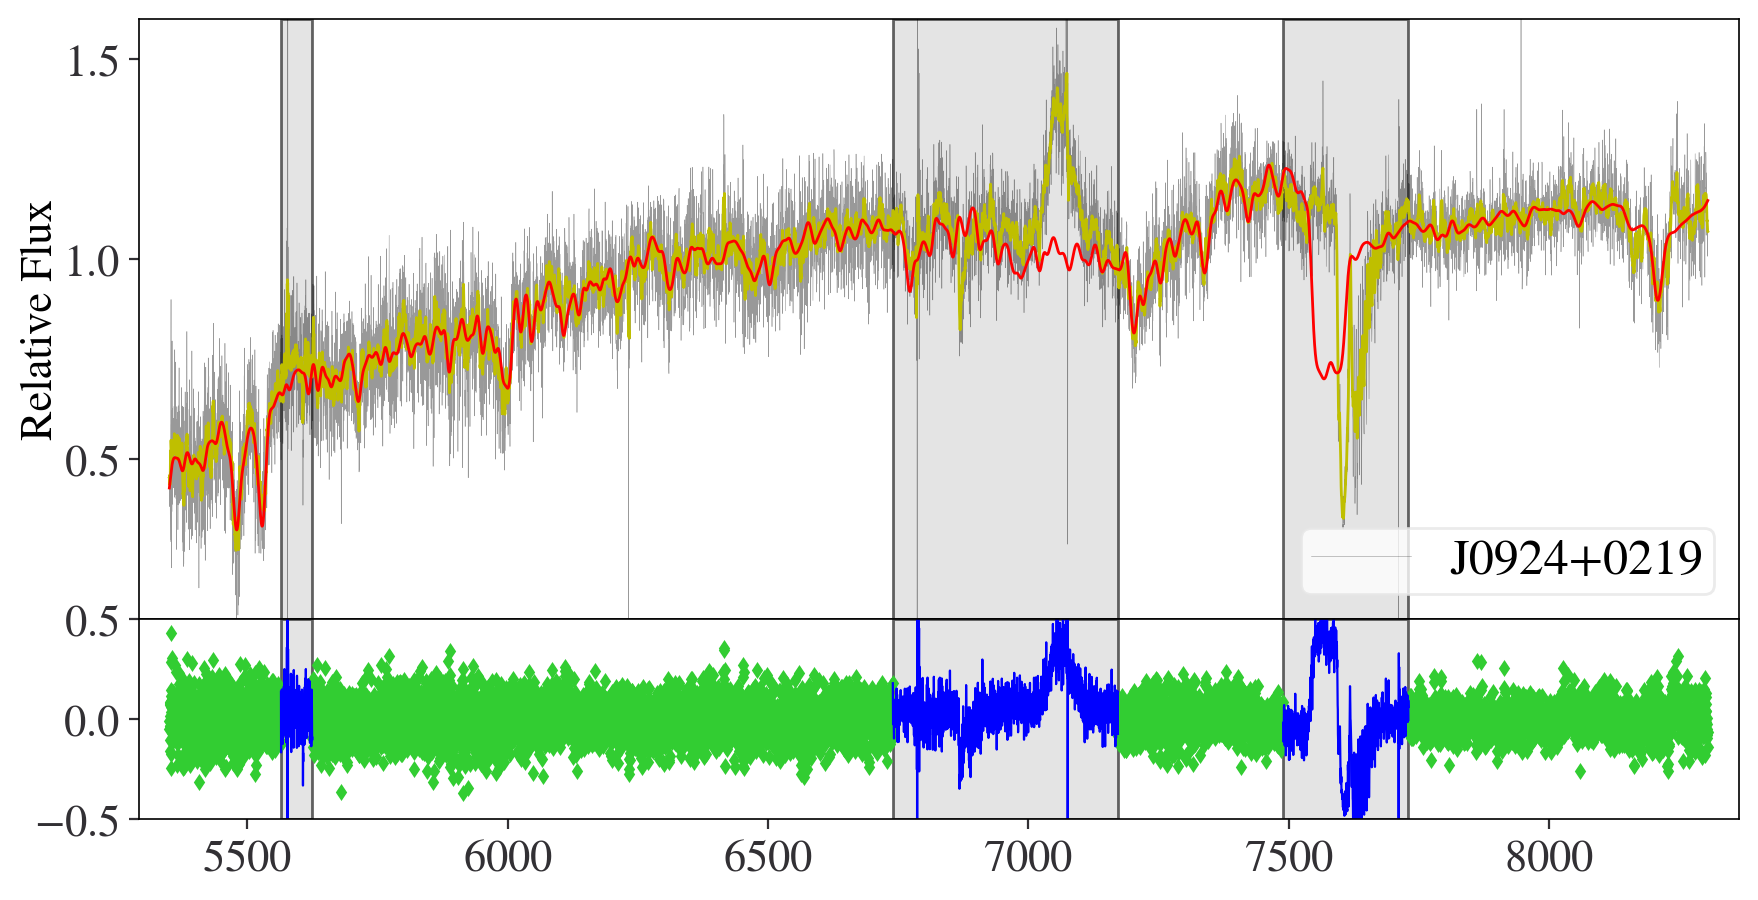

In [24]:
fig = plt.figure()
frame1=fig.add_axes((.1,.3,.8,.6))
boxsize=11
x = np.exp(spec.wav_rebinned)*(1.0 + lens_z[4])
ll, rr = np.min(x), np.max(x)
gal_rebinn = spec1d.Spec1d(wav=x, flux=spec.flux_rebinned, verbose=False)
gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize, verbose=False)
bst = fit_data[0] #spec.best_fit[0]
goodpixels = np.trim_zeros(fit_data[1], 'b').astype('int')#spec.goodpixels[0]
#plt.xlabel(r"Wavelength (Ang)", fontsize=16)
plt.ylabel("Relative Flux", fontsize=16)
plt.plot(x, gal_rebinn['flux'], color='k', linewidth=0.2, label=lens_name[4], alpha=0.4) #'unsmoothed flux'
plt.plot(x, gal_smooth, color='y', linewidth=1) #, label='smoothed flux'
plt.plot(x, bst, 'r', linewidth=1) #, label='modelfit'
w = np.flatnonzero(np.diff(goodpixels) > 1)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    #print(x[a], x[b])
    plt.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.6)
    #plt.plot(x[a : b + 1], resid[a : b + 1], 'b')
    
# If the span is two thin than the function doesn't plot it visbly. So increased the span manually.
#plt.axvspan(5570, 5580, facecolor='lightgray')
plt.legend(labelcolor='k', loc=4)
plt.ylim(0.1, 1.6)
frame1.set_xticklabels([])
plt.xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
#plt.xlim(ll, rr)
#plt.xticks(np.arange(5780, x[-1]+30, 250))

frame2=fig.add_axes((.1,.1,.8,.2))
resid = gal_rebinn['flux'] - bst
plt.plot(x[goodpixels], resid[goodpixels], 'd', color='LimeGreen',
          mec='LimeGreen', ms=3)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    plt.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.6)
    plt.plot(x[a : b + 1], resid[a : b + 1], 'b')

plt.xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
plt.ylim(-0.5, 0.5)
#plt.xlabel(r"Wavelength (Ang)", fontsize=16)
#plt.savefig('paper_plots/J0924_veldis.pdf', format='pdf', dpi=200, bbox_inches='tight')

In [25]:
# J1433 veldis plot
spec = Veldis(wav=J1433_spec['wav'], flux=J1433_spec['flux'], var=J1433_spec['var'],
             trimsec=trim_sp[5])

 Spectrum Start:  5253.10
 Spectrum End:     8340.73
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.25



In [26]:
spec.cal_parm(z=lens_z[5], high_z=True, logscale=True, veldis_start=250, noise_scale=0.01, doplot=False)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389945 km/s


In [27]:
fit_data = np.loadtxt('../velocity_dispersion/J1433_bestfit_veldis.txt')

(-0.5, 0.5)

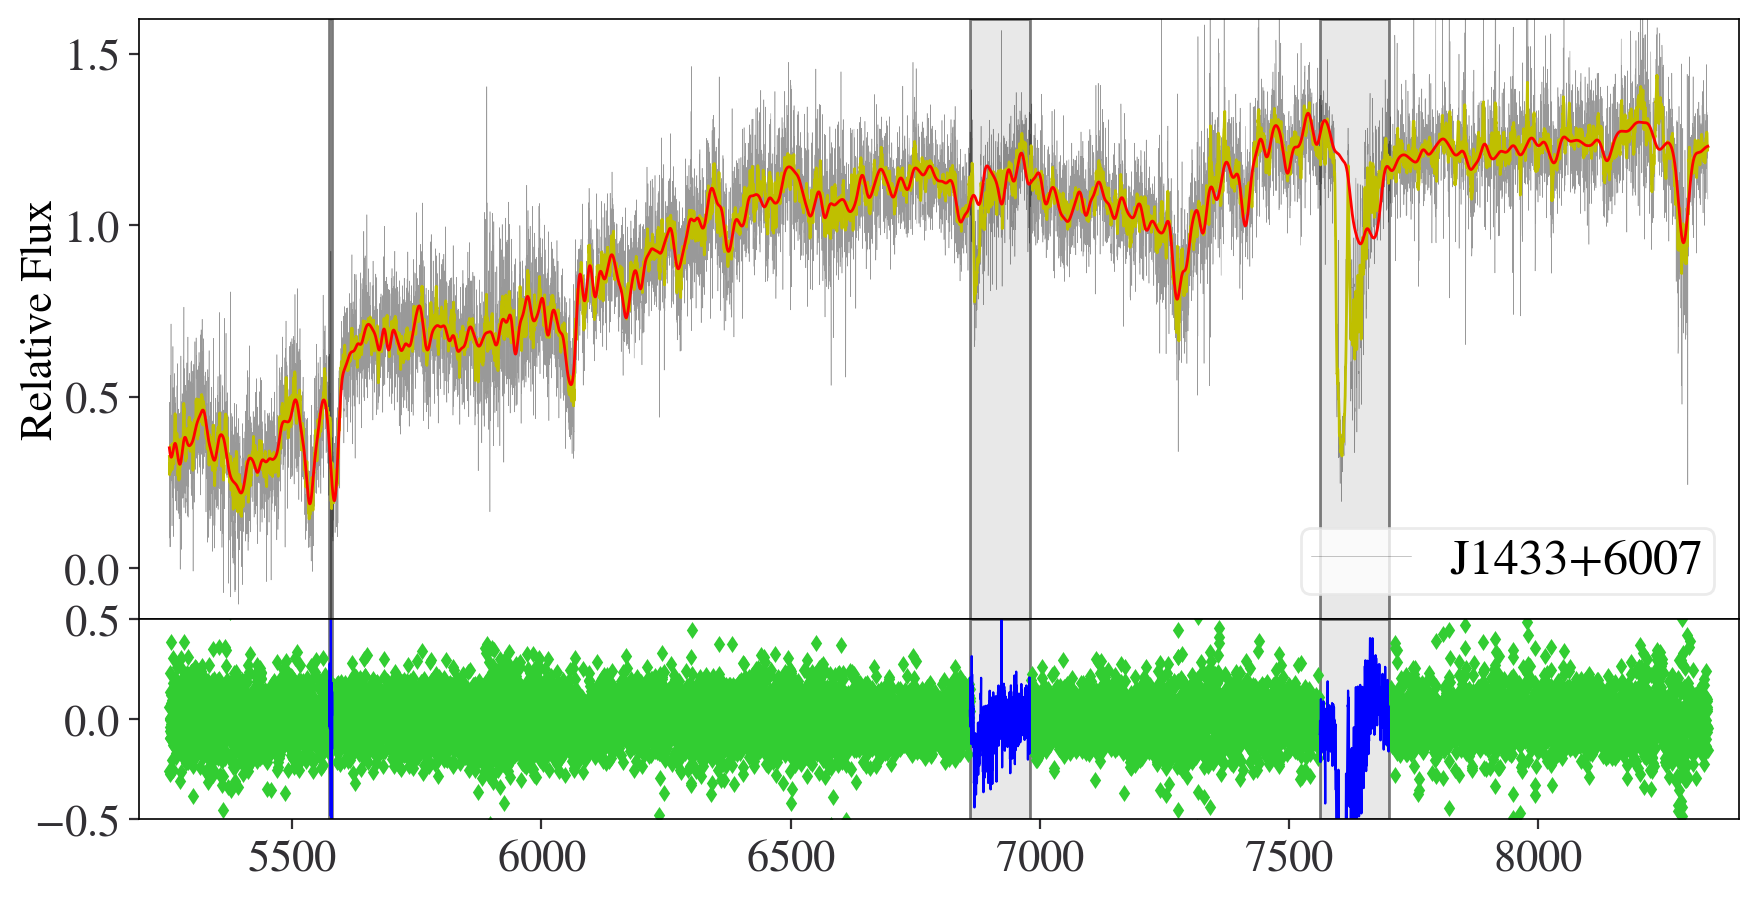

In [28]:
fig = plt.figure()
frame1=fig.add_axes((.1,.3,.8,.6))
boxsize=11
x = np.exp(spec.wav_rebinned)*(1.0 + lens_z[5])
ll, rr = np.min(x), np.max(x)
gal_rebinn = spec1d.Spec1d(wav=x, flux=spec.flux_rebinned, verbose=False)
gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize, verbose=False)
bst = fit_data[0] #spec.best_fit[0]
goodpixels = np.trim_zeros(fit_data[1], 'b').astype('int')#spec.goodpixels[0]
#plt.xlabel(r"Wavelength (Ang)", fontsize=16)
plt.ylabel("Relative Flux", fontsize=16)
plt.plot(x, gal_rebinn['flux'], color='k', linewidth=0.2, label=lens_name[5], alpha=0.4) #'unsmoothed flux'
plt.plot(x, gal_smooth, color='y', linewidth=1) #, label='smoothed flux'
plt.plot(x, bst, 'r', linewidth=1) #, label='modelfit'
w = np.flatnonzero(np.diff(goodpixels) > 1)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    #print(x[a], x[b])
    plt.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.5)
    #plt.plot(x[a : b + 1], resid[a : b + 1], 'b')
    
# If the span is two thin than the function doesn't plot it visbly. So increased the span manually.
#plt.axvspan(5570, 5580, facecolor='lightgray')
plt.legend(labelcolor='k', loc=4)
plt.ylim(-0.15, 1.6)
frame1.set_xticklabels([])
plt.xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
#plt.xlim(ll, rr)
#plt.xticks(np.arange(5780, x[-1]+30, 250))

frame2=fig.add_axes((.1,.1,.8,.2))
resid = gal_rebinn['flux'] - bst
plt.plot(x[goodpixels], resid[goodpixels], 'd', color='LimeGreen',
          mec='LimeGreen', ms=3)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    plt.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.5)
    plt.plot(x[a : b + 1], resid[a : b + 1], 'b')

plt.xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
plt.ylim(-0.5, 0.5)
#plt.xlabel(r"Wavelength (Ang)", fontsize=16)
#plt.savefig('paper_plots/J1433_veldis.pdf', format='pdf', dpi=200, bbox_inches='tight')

In [29]:
# J1817 veldis plot
spec = Veldis(wav=J1817_spec['wav'], flux=J1817_spec['flux'], var=J1817_spec['var'],
             trimsec=trim_sp[6])

 Spectrum Start:  5353.84
 Spectrum End:     7118.67
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.24



In [30]:
spec.cal_parm(z=lens_z[6], high_z=True, logscale=True, veldis_start=250, noise_scale=0.01, doplot=False)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389932 km/s


In [31]:
fit_data = np.loadtxt('../velocity_dispersion/J1817_bestfit_veldis.txt')

(-1.5, 1.5)

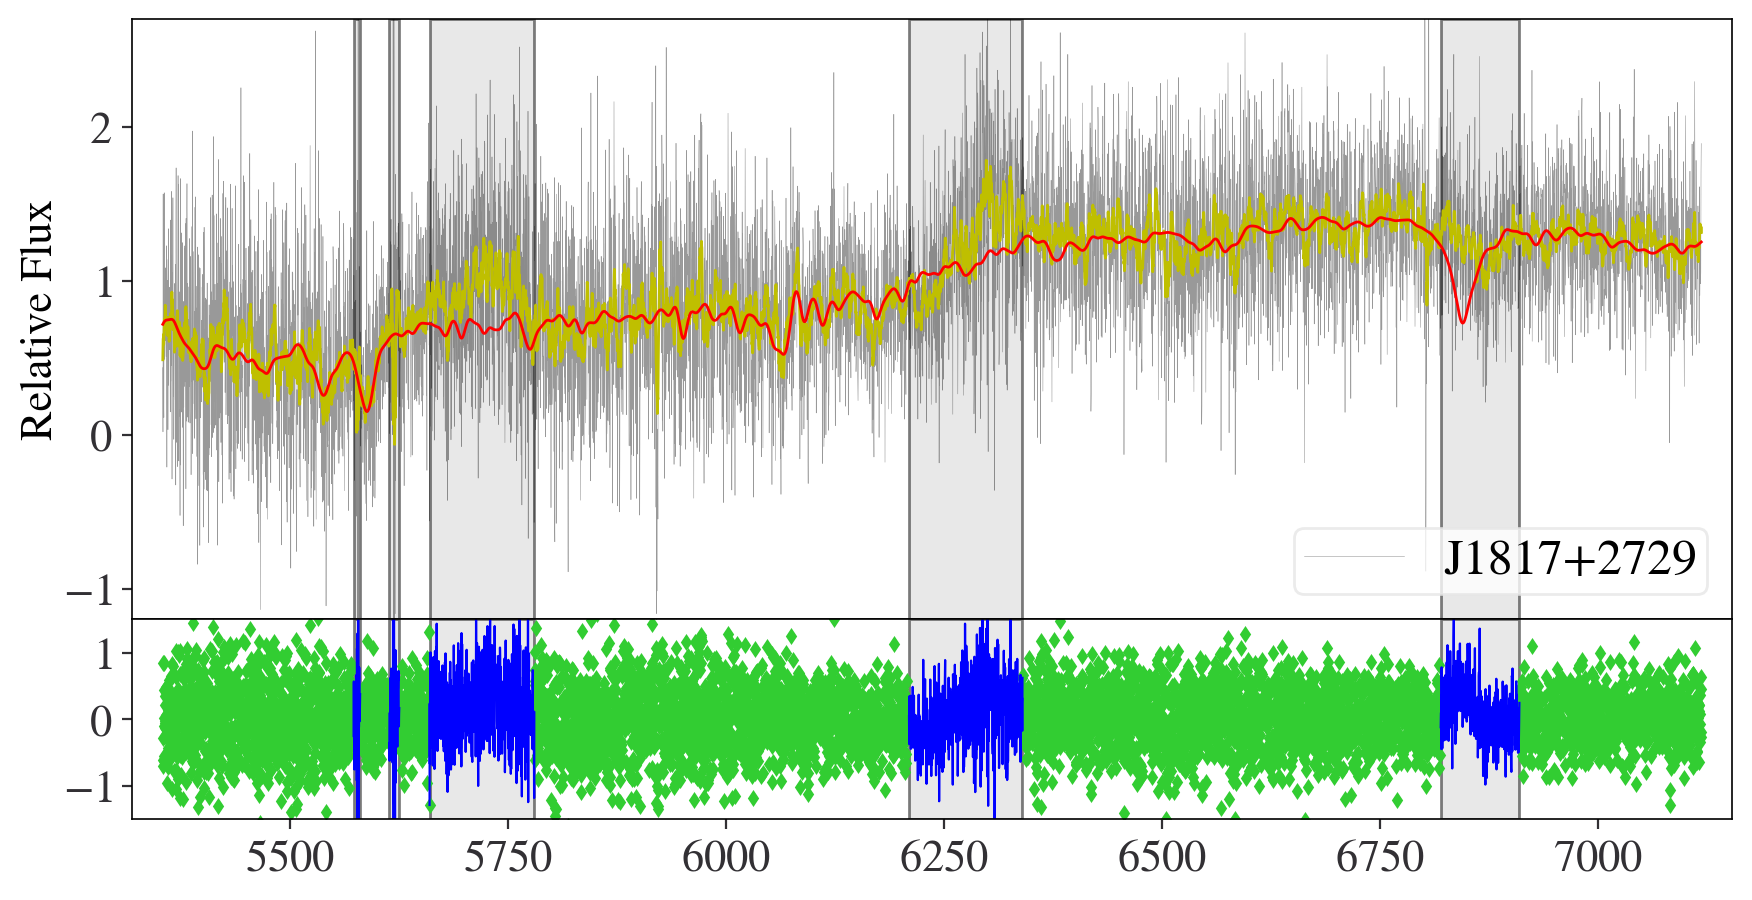

In [32]:
fig = plt.figure()
frame1=fig.add_axes((.1,.3,.8,.6))
boxsize=15
x = np.exp(spec.wav_rebinned)*(1.0 + lens_z[6])
ll, rr = np.min(x), np.max(x)
gal_rebinn = spec1d.Spec1d(wav=x, flux=spec.flux_rebinned, verbose=False)
gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize, verbose=False)
bst = fit_data[0] #spec.best_fit[0]
goodpixels = np.trim_zeros(fit_data[1], 'b').astype('int')#spec.goodpixels[0]
#plt.xlabel(r"Wavelength (Ang)", fontsize=16)
plt.ylabel("Relative Flux", fontsize=16)
plt.plot(x, gal_rebinn['flux'], color='k', linewidth=0.2, label=lens_name[6], alpha=0.4) #'unsmoothed flux'
plt.plot(x, gal_smooth, color='y', linewidth=1) #, label='smoothed flux'
plt.plot(x, bst, 'r', linewidth=1.0) #, label='modelfit'
w = np.flatnonzero(np.diff(goodpixels) > 1)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    #print(x[a], x[b])
    plt.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.5)
    #plt.plot(x[a : b + 1], resid[a : b + 1], 'b')
    
# If the span is two thin than the function doesn't plot it visbly. So increased the span manually.
#plt.axvspan(5570, 5580, facecolor='lightgray')
plt.legend(labelcolor='k', loc=4)
plt.ylim(-1.2, 2.7)
frame1.set_xticklabels([])
plt.xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
#plt.xlim(ll, rr)
#plt.xticks(np.arange(5780, x[-1]+30, 250))

frame2=fig.add_axes((.1,.1,.8,.2))
resid = gal_rebinn['flux'] - bst
plt.plot(x[goodpixels], resid[goodpixels], 'd', color='LimeGreen',
          mec='LimeGreen', ms=3)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    plt.axvspan(x[a], x[b], facecolor='lightgray', alpha=0.5)
    plt.plot(x[a : b + 1], resid[a : b + 1], 'b')

plt.xlim([ll, rr] + np.array([-0.02, 0.02])*(rr - ll))
plt.ylim(-1.5, 1.5)
#plt.xlabel(r"Wavelength (Ang)", fontsize=16)
#plt.savefig('paper_plots/J1817_veldis.pdf', format='pdf', dpi=200, bbox_inches='tight')